# Código para plotar histogramas conjuntos para todos os testes individualmente

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(resultados, *samples):
    # Número de amostras
    n_samples = len(samples)

    # Calcula o número de linhas e colunas para os subplots
    # Aqui, estamos tentando manter a grade o mais quadrada possível
    n_cols = int(np.ceil(np.sqrt(n_samples)))
    n_rows = int(np.ceil(n_samples / n_cols))

    # Cria uma figura grande para acomodar todos os histogramas
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

    # Ajusta os subplots para evitar sobreposição
    plt.tight_layout()

    # Itera sobre todas as amostras e os respectivos eixos
    for i, sample in enumerate(samples):

        # Encontra o eixo atual onde o histograma será plotado
        if n_samples == 1:
            ax = axs
        elif n_rows == 1 or n_cols == 1:
            ax = axs[i]
        else:
            ax = axs[i // n_cols, i % n_cols]

        # Plota o histograma da amostra atual no eixo atual
        ax.hist(sample, bins=20, alpha=0.75)
        ax.set_title(f'amostra{i} {resultados[i]}')

    # Esconde os eixos extras se o número de amostras não preencher a grade
    for i in range(n_samples, n_rows * n_cols):
        fig.delaxes(axs.flatten()[i])

    plt.show()




# Kolmogorov Smirnov

### Procedimento:


1.  Utilizamos grupos de amostras com tamanho 35, de quatro tipos diferentes de distribuição com nível de significância 0.05:

*   Desconhecida
*   Normal
*   Cauchy
*   Poisson

2.   Calculamos o Dcalc, que é a máxima diferença absoluta entre a Função de Distribuição Acumulada Empírica e a Função de Distribuição Acumulada Teórica;
3.   Calculamos o Dc utilizando a tabela e comparamos com Dcalc com o objetivo de analisar se a H0 será aceita ou rejeitada.


Lembrando que:

Nível de significância = 0.05

* Dcalc > Dcrítico: rejeitamos H0
* Dcalc < Dcrítico: não rejeitamos H0


In [ ]:
from numpy.random import seed
from numpy.random import normal
from numpy.random import exponential
from scipy.stats import kstest, norm, uniform, expon, poisson
import numpy as np
import math
import matplotlib.pyplot as plt

#### Calculando Dcalc para todas as distribuições:

In [ ]:
#histograma
def HistogramaSimples(data):

    plt.hist(data, bins=15, color='blue', edgecolor='black')
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

def HistogramaComparativo(data):

    #data é um array de arrays

    plt.figure(figsize=(10,5))
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)

    for i in range(len(data)):
        plt.hist(data[i], bins=15, color='blue', edgecolor='black', alpha=0.5)


In [ ]:
#Codigo reserva kolmogorov

import pandas as pd
from math import sqrt
import scipy.stats as stats


def KolmogorovSmirnov(rol,Dtab,tamanho=35,dist=None, graf = True):

    print('\nKolmogorov-Smirnov\n')

    #H0 = Fobs(x) = Fesp(x)
    #H1 = Fobs(x) != Fesp(x)



    # Dcalc = max{|Fesp(x) - Fob(x)|,|fsp(x) - Fob(x-1)|}
    #Fesp = Frequencia relativa
    #Fob = Frequencia relativa acumulada
    Media = rol.mean()
    Variancia = rol.var()
    DesvioPadrao = rol.std()
    mediana = np.median(rol)
    min = rol.min()
    maximum = rol.max()
    soma = rol.sum()




    if graf:
        HistogramaSimples(rol)
        print('Media = ',Media)
        print('Variancia = ',Variancia)
        print('DesvioPadrao = ',DesvioPadrao)
        print("Mediana = ",mediana)
        print("Minimo = ",min)
        print("Maximo = ",maximum)
        print("Soma = ",soma)
        print("Contagem = ",tamanho)






        Tabela = pd.DataFrame(columns=['xi','Fobs','Fa','Fra','zcalc','fesp','|fesp(xi) - fra(xi)|','|fesp(xi) - fra(xi-1)|'])


        tabG = {'0.20':1.07/sqrt(tamanho),'0.15':1.14/sqrt(tamanho),'0.10':1.22/sqrt(tamanho),'0.05':1.36/sqrt(tamanho),'0.025':1.48/sqrt(tamanho),'0.01':1.63/sqrt(tamanho),'0.005':1.73/sqrt(tamanho)}

        Tabela['xi'], Tabela['Fobs'] = np.unique(rol, return_counts=True)
        Tabela['Fa'] = Tabela['Fobs'].cumsum()
        Tabela['Fra'] = Tabela['Fa']/Tabela['Fobs'].sum() #Frequencia relativa acumulada --> Fob.sum = tamanho da rol
        Tabela['zcalc'] = (Tabela['xi'] - Media)/DesvioPadrao
        Tabela['fesp'] = norm.cdf(Tabela['zcalc'])
        Tabela['|fesp(xi) - fra(xi)|'] = abs(Tabela['fesp'] - Tabela['Fra'])
        Tabela['|fesp(xi) - fra(xi-1)|'] = abs(Tabela['fesp'] - Tabela['Fra'].shift(1))
        #Adicionando o primeiro item na coluna |fesp(xi) - fra(xi-1)|
        Tabela.loc[0,'|fesp(xi) - fra(xi-1)|'] = abs(Tabela.loc[0,'fesp'] - 0)

        #Dcalc = Maximo de |fesp(xi) - fra(xi)| e |fesp(xi) - fra(xi-1)|

        Dcalc = max(abs(Tabela['|fesp(xi) - fra(xi)|'].max()),abs(Tabela['|fesp(xi) - fra(xi-1)|'].max()))
        #Usar p-valores (Distribuição Normal inversa e verifica se p-valor >= alpha) ->  Hipotese H1,casso contrario H0

        #Dtab = TabelaG.loc[tamanho-1,alpha]
        # Dtab = tabG.loc[tamanho-1,str(alpha)]

        if graf:
            Tabela

        print(f'Dcalc nosso = {Dcalc}')


        if dist == 'gamma':
          D_plus = np.max(np.abs(Tabela['|fesp(xi) - fra(xi)|']))
          D_minus = np.max(np.abs(Tabela['|fesp(xi) - fra(xi-1)|']))
          Dcalc = max(D_plus, D_minus)
          statistica, p_valor = kstest(rol, dist, args=(2,1))
          print(f'Dcalc do scipy = {statistica}')
        elif dist =='norm':
          statistica, p_valor = kstest(rol, dist, args=(Media,DesvioPadrao))
          print(f'Dcalc do scipy = {statistica}')
        elif dist == 'cauchy':
          statistica, p_valor = kstest(rol, dist, args=(mediana, 1))
          print(f'Dcalc do scipy = {statistica}')
        elif dist == 'poisson':
          lam = np.mean(rol)
          statistica, p_valor = kstest(rol, lambda k: stats.poisson.cdf(k, lam))
          print(f'Dcalc do scipy = {statistica}')






        #Se Dcalc < Dtab --> Aceita H0
        if Dcalc < Dtab:
            print('\nDcalc < Dtab --> Aceita H0')
            return True


        #Caso contrario --> Rejeita H0
        else:
            print('\nDcalc > Dtab --> Rejeita H0')
            return False


        # statistica, p_valor = shapiro(rol)

In [ ]:
# Casos de teste

ProdBienalAvioes = np.array([15, 16, 18, 19, 20, 22, 23, 23, 24, 24, 25, 28, 28, 29, 30, 30, 21, 32, 32, 34, 46, 36, 29, 16, 32, 20, 23, 23, 12, 25, 37, 27, 34 , 26, 34]) # amostra manual
Mi = 30
sigma = 5
Normal = np.random.normal(Mi,sigma,35) # amostra normal
cauchy = np.random.standard_cauchy(35) # amostra cauchy

poisson_dist = poisson(mu=1)
amostras_poisson = poisson_dist.rvs(size=35) # amostra poisson

In [ ]:
cauchy

array([ 3.18504947e+00, -1.29987712e-02,  3.17135630e-01, -1.17154600e+00,
        2.99896501e-01,  1.00513810e-01, -2.77134446e+00,  1.29305692e+00,
        6.04512507e-01, -4.00465322e-01, -1.26067191e+01, -6.44906858e-01,
        3.55936611e-01,  2.58367727e+00, -1.33345472e+00,  2.15349663e+01,
        4.42698964e-01, -6.46045742e-01,  3.76126369e+00,  6.09732063e-01,
        1.54439872e+00, -3.70104815e-01,  2.88309418e+00, -7.98233691e-01,
       -3.07112472e-01, -1.03432229e-01, -2.09960241e+00, -4.64598550e-01,
        1.47337066e-01,  3.00347851e+00,  4.87157229e-01,  3.93840070e-03,
        2.26484702e+00,  8.57646368e-01, -6.92260608e-01])


Kolmogorov-Smirnov



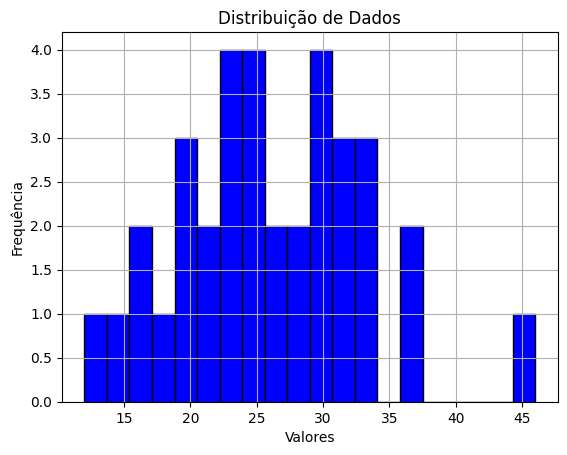

Media =  26.085714285714285
Variancia =  50.53551020408163
DesvioPadrao =  7.108833251953631
Mediana =  25.0
Minimo =  12
Maximo =  46
Soma =  913
Contagem =  35
Dcalc nosso = 0.07497912514641625
Dcalc do scipy = 0.07497912514641625

Dcalc < Dtab --> Aceita H0


True

In [ ]:
KolmogorovSmirnov(ProdBienalAvioes,0.23,35) # Dc = 0,23


Kolmogorov-Smirnov



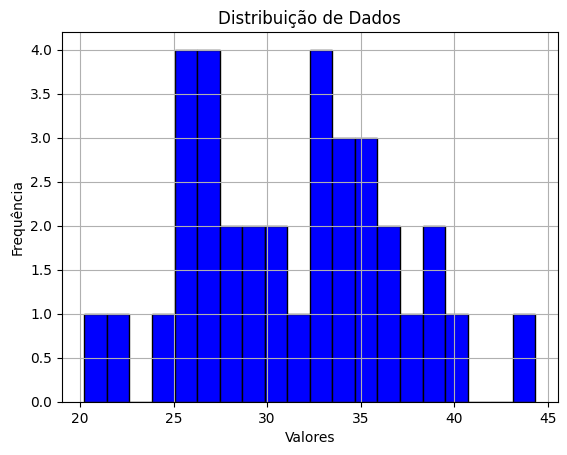

Media =  31.38158510797023
Variancia =  28.607966554668028
DesvioPadrao =  5.348641561618055
Mediana =  31.872811428899706
Minimo =  20.237422651955193
Maximo =  44.3180772128044
Soma =  1098.355478778958
Contagem =  35
Dcalc nosso = 0.08986010776540099
Dcalc do scipy = 0.08986010776540099

Dcalc < Dtab --> Aceita H0


True

In [ ]:
KolmogorovSmirnov(Normal, 0.23, 35, 'norm')


Kolmogorov-Smirnov



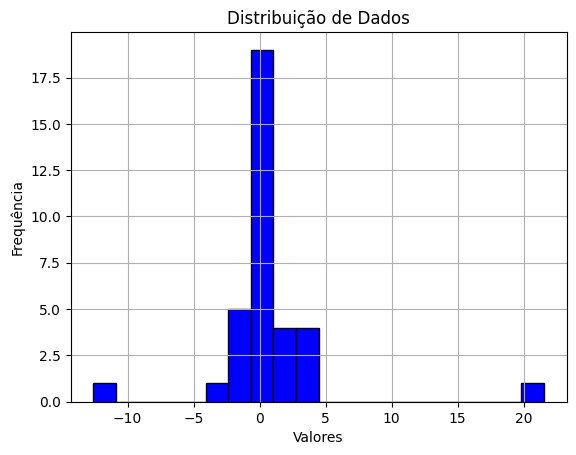

Media =  0.6245003262596803
Variancia =  19.616669502404243
DesvioPadrao =  4.42907095251411
Mediana =  0.14733706645140843
Minimo =  -12.606719135496581
Maximo =  21.534966283295038
Soma =  21.857511419088812
Contagem =  35
Dcalc nosso = 0.24350534550826
Dcalc do scipy = 0.11604556507283897

Dcalc > Dtab --> Rejeita H0


False

In [ ]:
KolmogorovSmirnov(cauchy,0.23,35, 'cauchy')


Kolmogorov-Smirnov



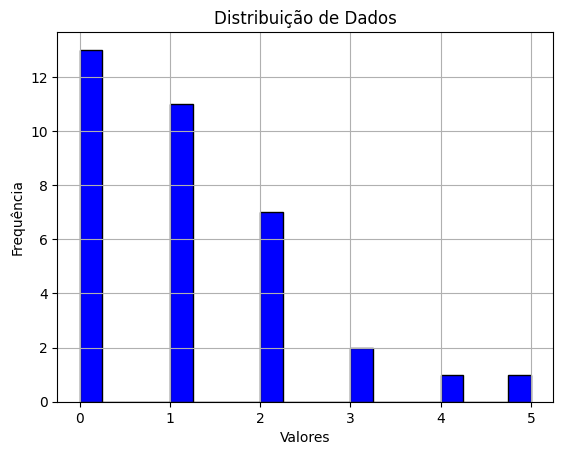

Media =  1.1428571428571428
Variancia =  1.493877551020408
DesvioPadrao =  1.2222428363547106
Mediana =  1.0
Minimo =  0
Maximo =  5
Soma =  40
Contagem =  35
Dcalc nosso = 0.23223716601304306
Dcalc do scipy = 0.3189065573239704

Dcalc > Dtab --> Rejeita H0


False

In [ ]:
KolmogorovSmirnov(amostras_poisson, 0.23, 35, 'poisson')

### Resumo resultados Kolmogorov

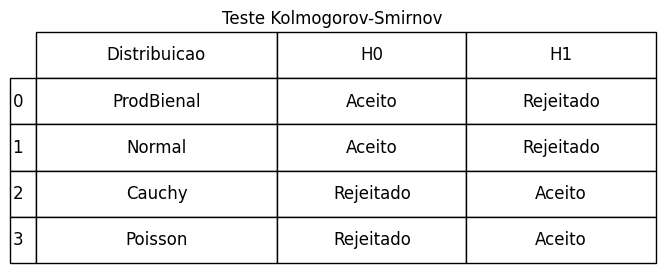

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

dados = {
    "Distribuicao": ["ProdBienal", "Normal", "Cauchy", "Poisson"],
    "H0": ["Aceito", "Aceito", "Rejeitado", "Rejeitado"],
    "H1": ["Rejeitado", "Rejeitado", "Aceito", "Aceito"]
}

# Convertendo os dados para um DataFrame do pandas
df = pd.DataFrame(dados)

# Criando uma figura sem eixos para a plotagem da tabela
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off') # Esconde os eixos

# Plotando a tabela
# O loc='center' centraliza a tabela na figura
# O bbox_to_anchor ajusta a posição da tabela dentro da figura
tbl = table(ax, df, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

# Ajustando o estilo da tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(12) # Ajusta o tamanho da fonte
tbl.auto_set_column_width(col=list(range(len(df.columns)))) # Ajusta a largura das colunas

plt.title("Teste Kolmogorov-Smirnov")

plt.show()

### Alguns testes em amostras adicionais


Kolmogorov-Smirnov



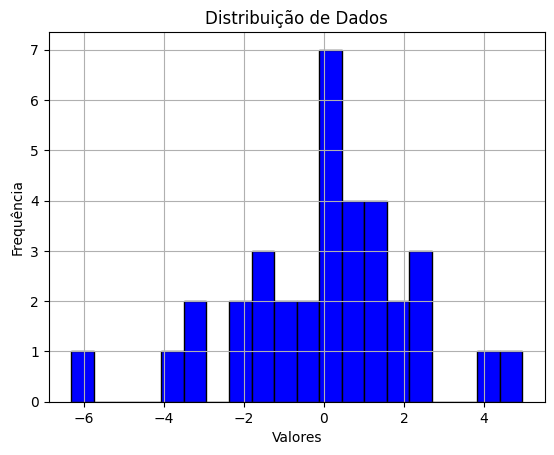

Media =  0.033174686085320884
Variancia =  4.851346983244946
DesvioPadrao =  2.20257735011621
Mediana =  0.1486442154506293
Minimo =  -6.316922949412487
Maximo =  4.95420772842417
Soma =  1.161114012986231
Contagem =  35
Dcalc nosso = 0.1142957141616801

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



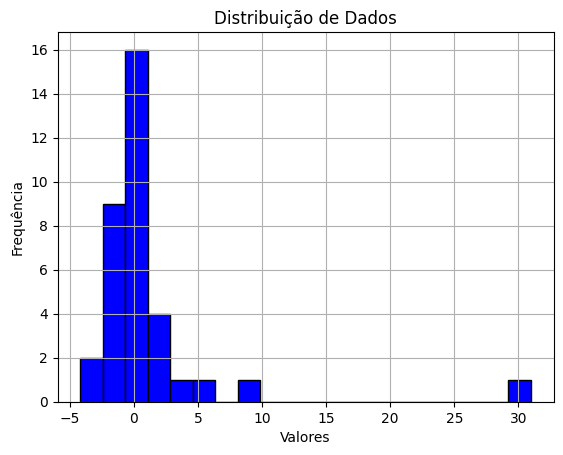

Media =  1.2010903394094132
Variancia =  30.859289238887225
DesvioPadrao =  5.5551137917136515
Mediana =  -0.011136890784434299
Minimo =  -4.179799707889022
Maximo =  30.973837131142453
Soma =  42.038161879329465
Contagem =  35
Dcalc nosso = 0.29505890367432874

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



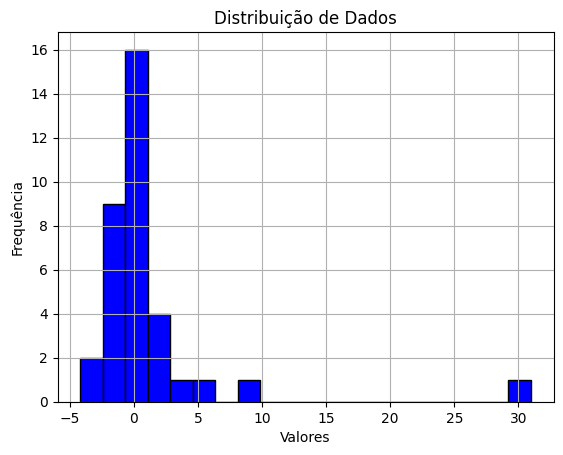

Media =  1.2010903394094132
Variancia =  30.859289238887225
DesvioPadrao =  5.5551137917136515
Mediana =  -0.011136890784434299
Minimo =  -4.179799707889022
Maximo =  30.973837131142453
Soma =  42.038161879329465
Contagem =  35
Dcalc nosso = 0.29505890367432874

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



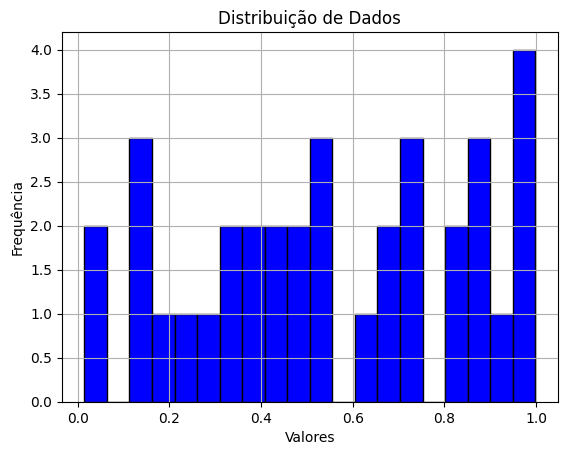

Media =  0.5542393409554935
Variancia =  0.08660797996361612
DesvioPadrao =  0.2942923375890309
Mediana =  0.5501569192288246
Minimo =  0.014154781377610948
Maximo =  0.9981938661198873
Soma =  19.398376933442275
Contagem =  35
Dcalc nosso = 0.10719659632981293

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



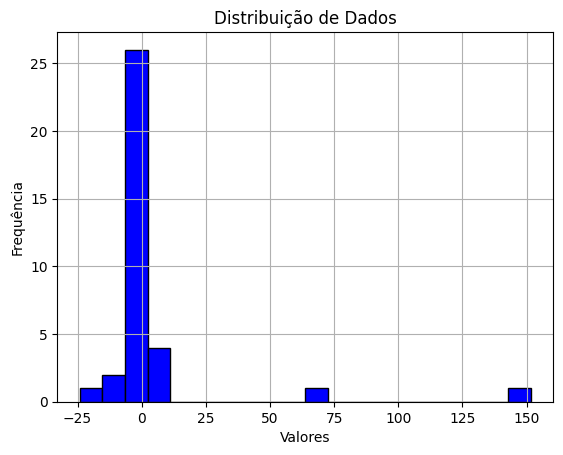

Media =  5.631369540305663
Variancia =  782.5190521509716
DesvioPadrao =  27.973542002237963
Mediana =  -0.18656545159134857
Minimo =  -24.076745912985967
Maximo =  151.672499131184
Soma =  197.0979339106982
Contagem =  35
Dcalc nosso = 0.3920090889600546

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



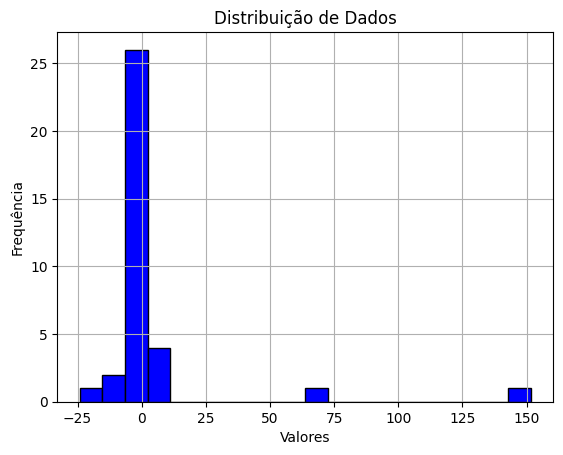

Media =  5.631369540305663
Variancia =  782.5190521509716
DesvioPadrao =  27.973542002237963
Mediana =  -0.18656545159134857
Minimo =  -24.076745912985967
Maximo =  151.672499131184
Soma =  197.0979339106982
Contagem =  35
Dcalc nosso = 0.3920090889600546

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



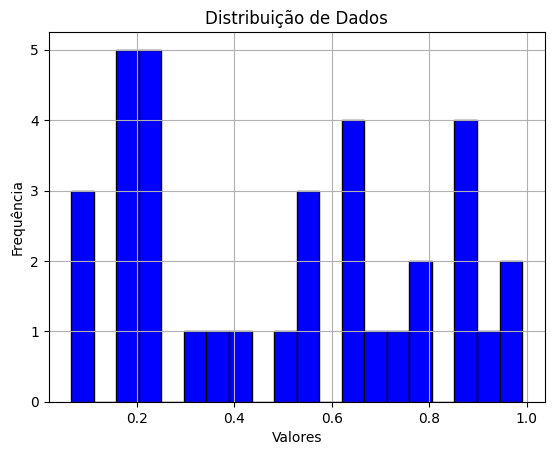

Media =  0.4995286966946036
Variancia =  0.08567549613428069
DesvioPadrao =  0.2927037685686344
Mediana =  0.5459191517599309
Minimo =  0.06489860386347612
Maximo =  0.9906129124243263
Soma =  17.483504384311125
Contagem =  35
Dcalc nosso = 0.18459369483771643

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



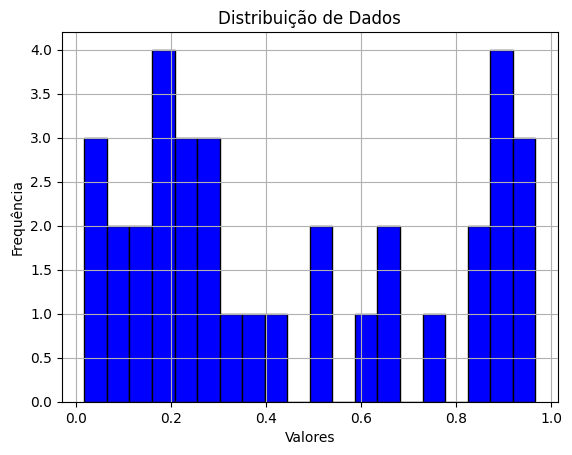

Media =  0.4537433754096347
Variancia =  0.1017857912673954
DesvioPadrao =  0.3190388554195169
Mediana =  0.3190598667167447
Minimo =  0.017120468264080535
Maximo =  0.9662421729484373
Soma =  15.881018139337215
Contagem =  35
Dcalc nosso = 0.18007603345361783

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



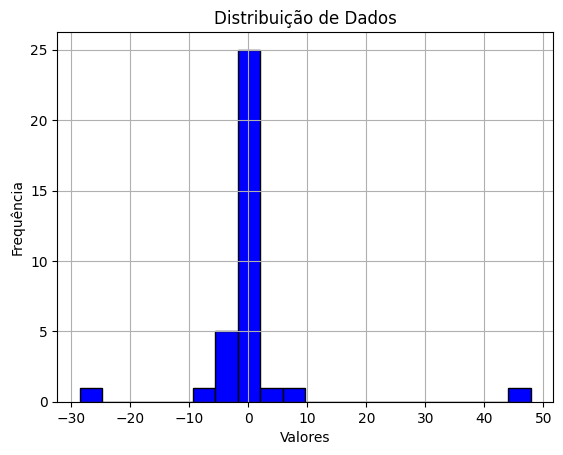

Media =  0.38522874227095727
Variancia =  92.92658099916734
DesvioPadrao =  9.639843411548101
Mediana =  -0.04295313189588234
Minimo =  -28.515081260413364
Maximo =  47.88706772889333
Soma =  13.483005979483504
Contagem =  35
Dcalc nosso = 0.38273149390659933

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



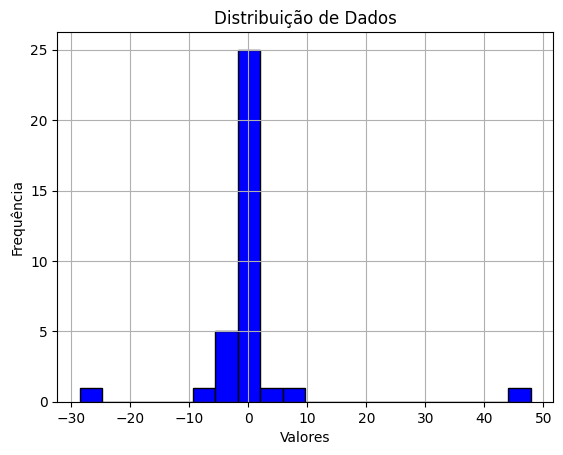

Media =  0.38522874227095727
Variancia =  92.92658099916734
DesvioPadrao =  9.639843411548101
Mediana =  -0.04295313189588234
Minimo =  -28.515081260413364
Maximo =  47.88706772889333
Soma =  13.483005979483504
Contagem =  35
Dcalc nosso = 0.38273149390659933

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



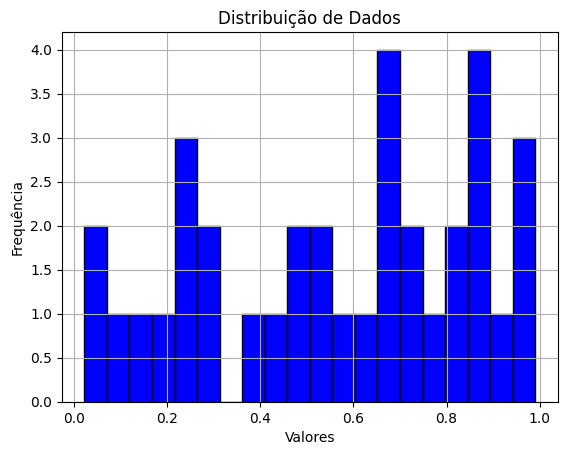

Media =  0.5619963629749843
Variancia =  0.08343719047554221
DesvioPadrao =  0.28885496442945585
Mediana =  0.6290788158702642
Minimo =  0.021853655103881153
Maximo =  0.9903458171220757
Soma =  19.66987270412445
Contagem =  35
Dcalc nosso = 0.12164533705461478

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



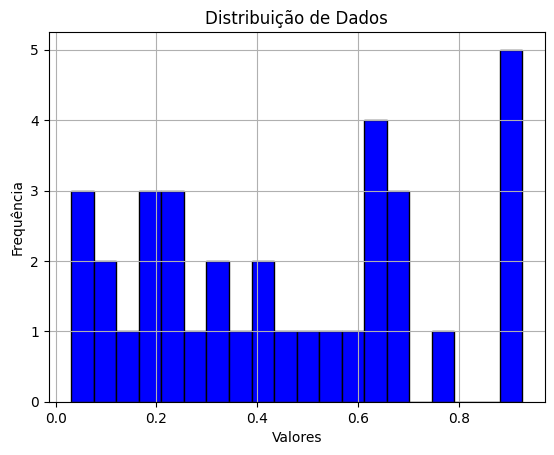

Media =  0.45322894891639515
Variancia =  0.07753091037443822
DesvioPadrao =  0.2784437292783557
Mediana =  0.430684276127946
Minimo =  0.030784478003188842
Maximo =  0.925516997557754
Soma =  15.863013212073831
Contagem =  35
Dcalc nosso = 0.13242246806711366

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



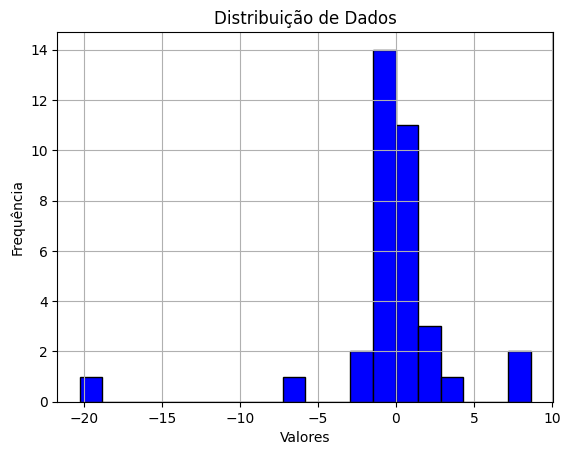

Media =  -0.1054893332110732
Variancia =  18.383916727522585
DesvioPadrao =  4.287646991943552
Mediana =  -0.06154552414735311
Minimo =  -20.24940124493791
Maximo =  8.652296973984008
Soma =  -3.692126662387562
Contagem =  35
Dcalc nosso = 0.3145393935771076

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



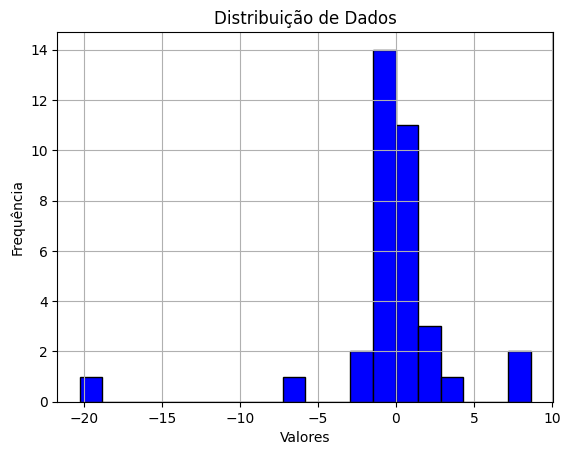

Media =  -0.1054893332110732
Variancia =  18.383916727522585
DesvioPadrao =  4.287646991943552
Mediana =  -0.06154552414735311
Minimo =  -20.24940124493791
Maximo =  8.652296973984008
Soma =  -3.692126662387562
Contagem =  35
Dcalc nosso = 0.3145393935771076

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



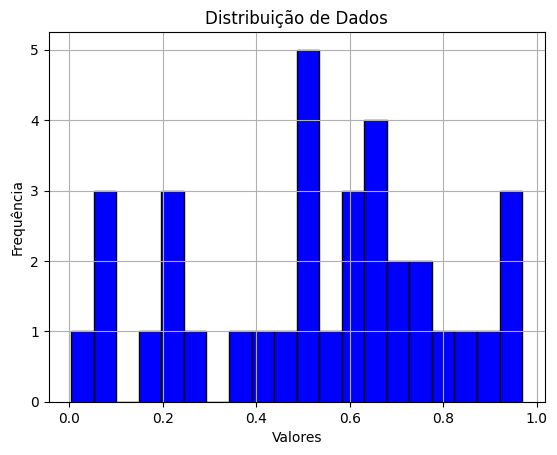

Media =  0.5249481583516541
Variancia =  0.07081583900097801
DesvioPadrao =  0.266112455553997
Mediana =  0.5451396166103297
Minimo =  0.004517979238770842
Maximo =  0.9683146443610084
Soma =  18.373185542307894
Contagem =  35
Dcalc nosso = 0.10990321355958965

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



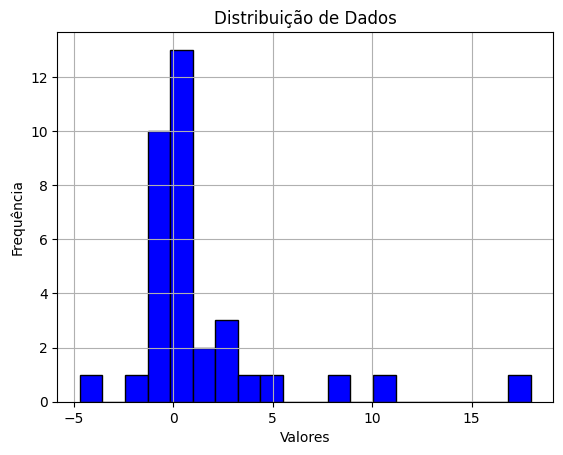

Media =  1.4457804774113245
Variancia =  15.326816710186515
DesvioPadrao =  3.9149478553598276
Mediana =  0.4189233024850922
Minimo =  -4.696651264195255
Maximo =  17.974297741913148
Soma =  50.602316709396355
Contagem =  35
Dcalc nosso = 0.2637531461974801

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



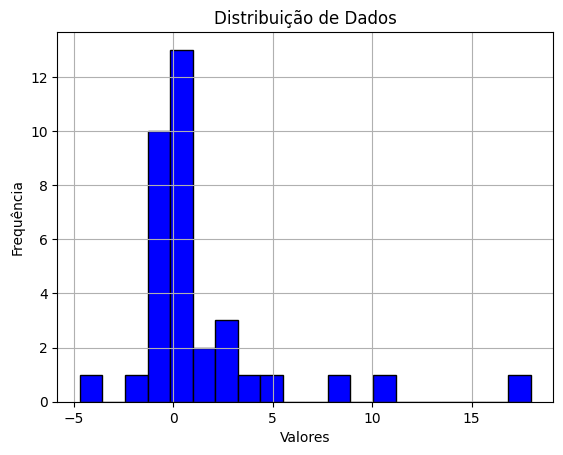

Media =  1.4457804774113245
Variancia =  15.326816710186515
DesvioPadrao =  3.9149478553598276
Mediana =  0.4189233024850922
Minimo =  -4.696651264195255
Maximo =  17.974297741913148
Soma =  50.602316709396355
Contagem =  35
Dcalc nosso = 0.2637531461974801

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



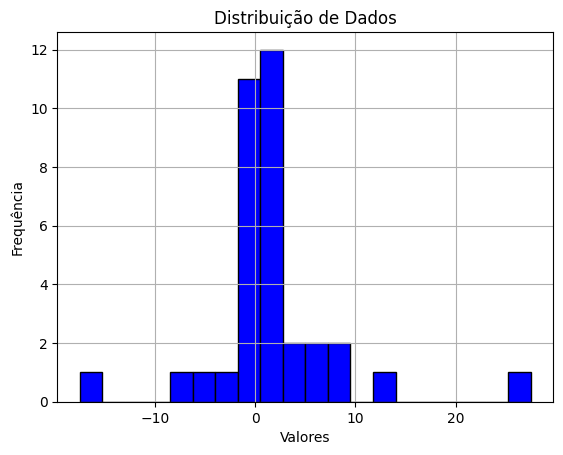

Media =  1.4193036373662362
Variancia =  44.1995125430945
DesvioPadrao =  6.648271395114259
Mediana =  0.5262271001048676
Minimo =  -17.510408393579013
Maximo =  27.517361078292332
Soma =  49.67562730781827
Contagem =  35
Dcalc nosso = 0.22976136999884056

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



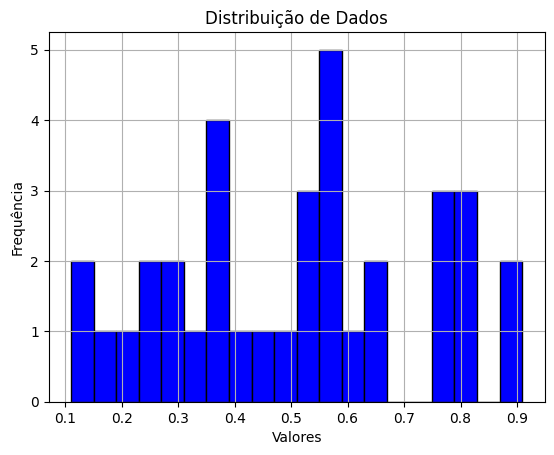

Media =  0.5020753957033914
Variancia =  0.04969776618057348
DesvioPadrao =  0.22292995801500856
Mediana =  0.5234567482185623
Minimo =  0.11052708408006362
Maximo =  0.9090462487264297
Soma =  17.5726388496187
Contagem =  35
Dcalc nosso = 0.09567117029115224

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



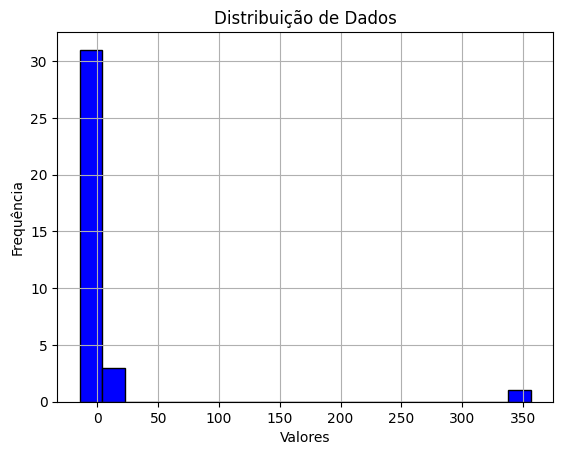

Media =  10.077990103142897
Variancia =  3547.4229653950338
DesvioPadrao =  59.560246518924295
Mediana =  0.1591327323365972
Minimo =  -14.368139095119112
Maximo =  356.5534718962907
Soma =  352.7296536100014
Contagem =  35
Dcalc nosso = 0.4703331243472689

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



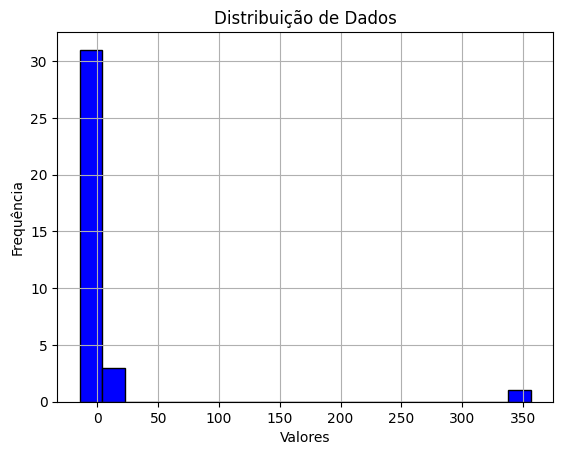

Media =  10.077990103142897
Variancia =  3547.4229653950338
DesvioPadrao =  59.560246518924295
Mediana =  0.1591327323365972
Minimo =  -14.368139095119112
Maximo =  356.5534718962907
Soma =  352.7296536100014
Contagem =  35
Dcalc nosso = 0.4703331243472689

Dcalc > Dtab --> Rejeita H0

Kolmogorov-Smirnov



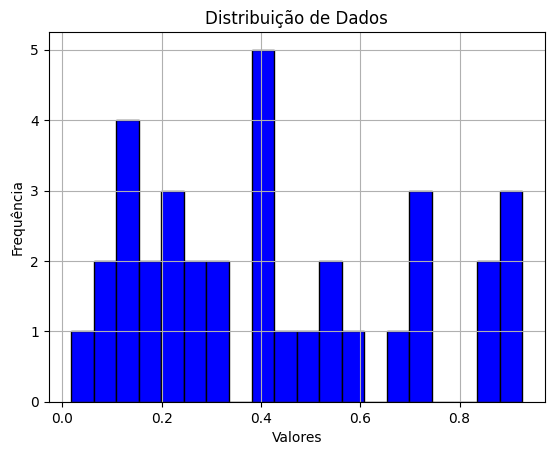

Media =  0.4251709196372864
Variancia =  0.0712756612469001
DesvioPadrao =  0.2669750198930606
Mediana =  0.4045933062352013
Minimo =  0.017726437981613108
Maximo =  0.9260722652122092
Soma =  14.880982187305024
Contagem =  35
Dcalc nosso = 0.12056094988484356

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



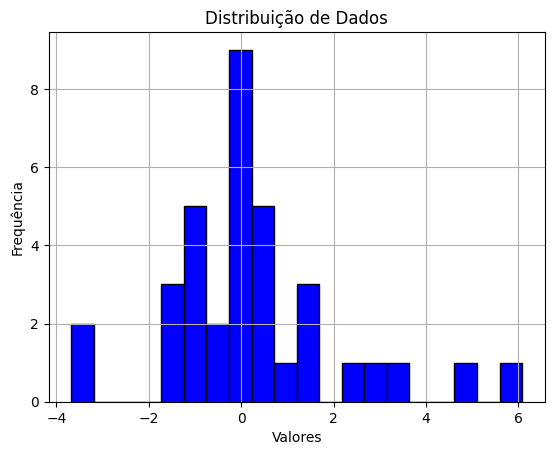

Media =  0.2723494447097097
Variancia =  3.7043523812621046
DesvioPadrao =  1.9246694212934605
Mediana =  0.0018062230136436546
Minimo =  -3.679294981632933
Maximo =  6.0786773541515995
Soma =  9.532230564839839
Contagem =  35
Dcalc nosso = 0.15731721544217037

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



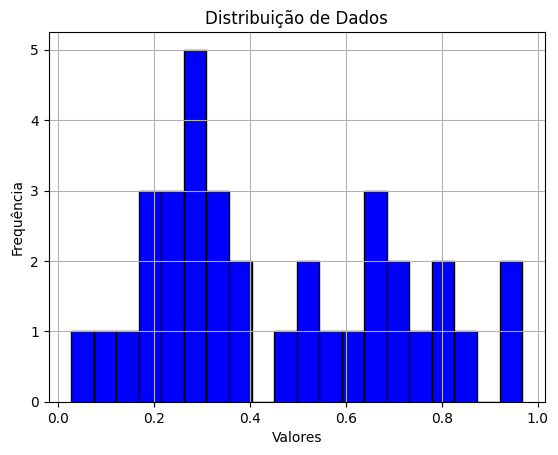

Media =  0.4592548488172774
Variancia =  0.06471731469715307
DesvioPadrao =  0.25439598011201564
Mediana =  0.3788676244074288
Minimo =  0.02719961289034445
Maximo =  0.967546979919989
Soma =  16.07391970860471
Contagem =  35
Dcalc nosso = 0.15873486033886253

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



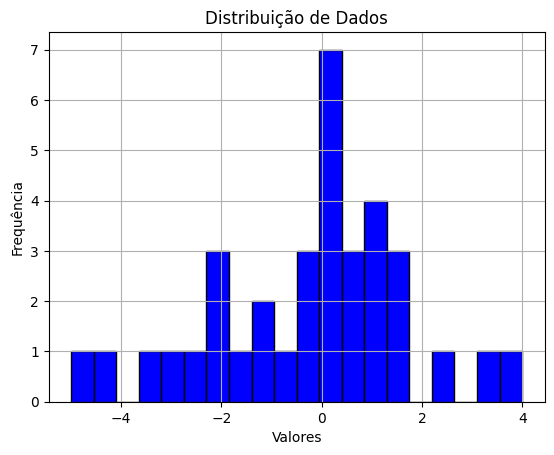

Media =  -0.24333052459427185
Variancia =  3.7170995902522863
DesvioPadrao =  1.9279781093809873
Mediana =  0.18748146691864734
Minimo =  -4.9977019881688065
Maximo =  3.9982302004541475
Soma =  -8.516568360799514
Contagem =  35
Dcalc nosso = 0.1597852337591642

Dcalc < Dtab --> Aceita H0

Kolmogorov-Smirnov



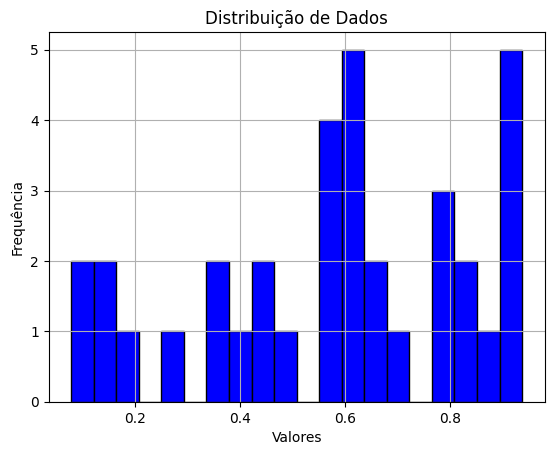

Media =  0.5799435723279919
Variancia =  0.06471955696157757
DesvioPadrao =  0.2544003871097243
Mediana =  0.6036077307688076
Minimo =  0.07936432292437923
Maximo =  0.9360872346890357
Soma =  20.298025031479714
Contagem =  35
Dcalc nosso = 0.11363517190858091

Dcalc < Dtab --> Aceita H0
['aceita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0']


In [ ]:
import numpy as np
import random


# Número de amostras
num_amostras = 10

# Lista para guardar as amostras
lista_de_amostras = []

# Gerar as amostras e adicionar à lista
for _ in range(num_amostras):
    amostra = np.random.rand(35)  # Gerar uma amostra de tamanho 36
    lista_de_amostras.append(amostra)

for _ in range(num_amostras):
    amostra = np.random.standard_cauchy(35)  # Gerar uma amostra de tamanho 36 com distribuição normal
    lista_de_amostras.append(amostra)

random.shuffle(lista_de_amostras)

resultados = []

for a in lista_de_amostras:

  if KolmogorovSmirnov(a, 0.23, 35, False) == True:
    resultados.append('aceita H0')
  elif KolmogorovSmirnov(a, 0.23, 35, False) == False:
    resultados.append('rejeita H0')


print(resultados)


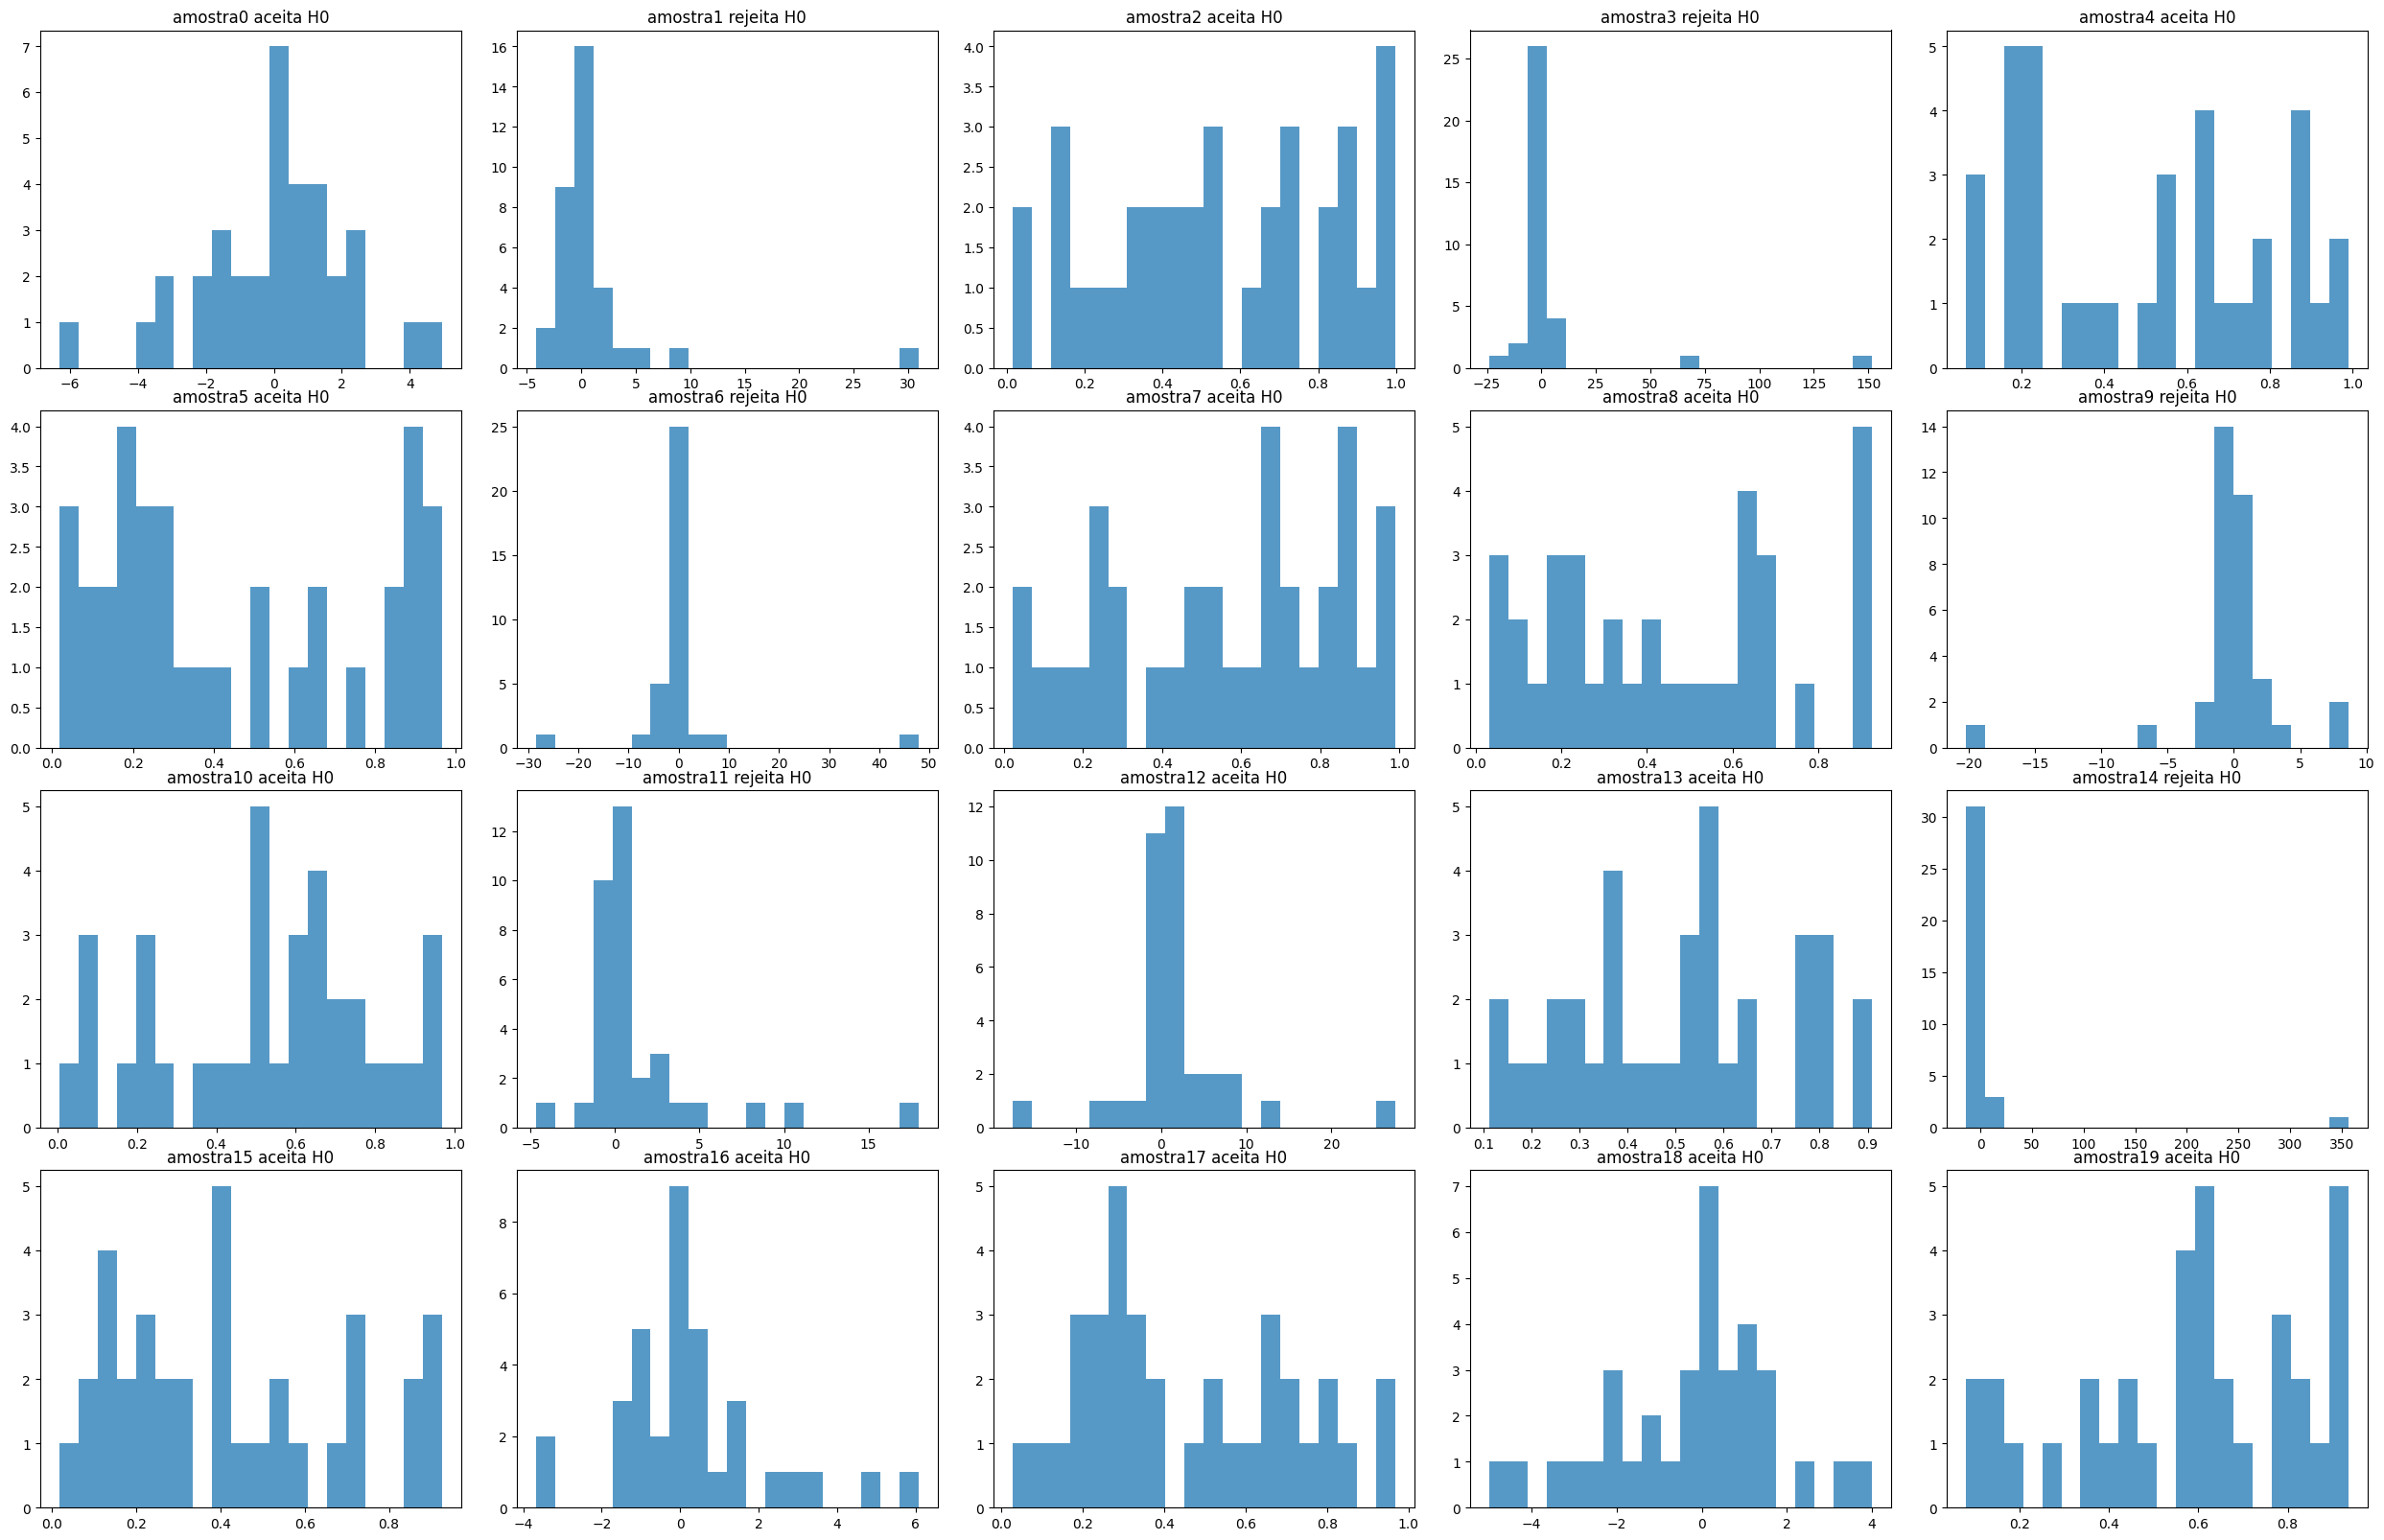

In [ ]:
plot_hist(resultados,*lista_de_amostras)

# Shapiro Wilk

### Procedimento:


1.  Utilizamos grupos de amostras aleatórias de quatro tipos diferentes de distribuição com nível de significância 0.05:

*   ProdMaqAgric: Conjunto de dados que representa alguma medida relacionada a produção de uma máquina agrícola. São 36 valores numéricos.
Este teste espera que o teste de Shapiro-Wilk seja bem-sucedido, ou seja, que a amostra passe no teste de normalidade.

*   Normal: Conjunto de dados gerado aleatoriamente a partir de uma distribuição normal com média 30 e desvio padrão 5, contendo 36 valores.
Este teste também espera um resultado positivo no teste de Shapiro-Wilk, pois os dados são gerados a partir de uma distribuição normal.

*   Gama: Conjunto de dados é gerado aleatoriamente a partir de uma distribuição gama com parâmetros 2 e 2, contendo 36 valores.
Espera-se que o teste de Shapiro-Wilk falhe neste caso, pois os dados não são provenientes de uma distribuição normal.

*   Cauchy padrão: Conjunto de dados é gerado aleatoriamente a partir de uma distribuição de Cauchy padrão, contendo 36 valores.
Assim como no teste anterior, espera-se que o teste de Shapiro-Wilk falhe, já que os dados não seguem uma distribuição normal.



Lembrando que:

Nível de significância = 0.05

* Wcalc >= Wcrítico: não rejeitamos H0
* Wcalc < Wcrítico: rejeitamos H0

Função para plotar os gráficos

In [ ]:
# função para plotar
def HistogramaSimples(data):

    plt.hist(data, bins=20, color='blue', edgecolor='black')
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

def HistogramaComparativo(data):

    #data é um array de arrays

    plt.figure(figsize=(10,5))
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)

    for i in range(len(data)):
        plt.hist(data[i], bins=20, color='blue', edgecolor='black', alpha=0.5)

Códigos do teste manual

In [ ]:
#Modulos
import numpy as np
import pandas as pd

from scipy.stats import *
from math import sqrt
from matplotlib import pyplot as plt

In [ ]:
def ShapiroWilk(rol,alpha=0.05,tamanho=36):

    print('\nShapiro-Wilk\n')
    print("\nHipotese:\n")
    print("H0 = A amostra segue uma distribuição normal")
    print("H1 = A amostra não segue uma distribuição normal")



    Media = rol.mean()
    Variancia = rol.var()
    DesvioPadrao = rol.std()
    mediana = np.median(rol)
    max = rol.max()
    min = rol.min()
    soma = rol.sum()


    print('Media = ',Media)
    print('Variancia = ',Variancia)
    print('DesvioPadrao = ',DesvioPadrao)
    print("Mediana = ",mediana)
    print("Minimo = ",min)
    print("Maximo = ",max)
    print("Soma = ",soma)
    print("Contagem = ",tamanho)

    HistogramaSimples(rol)



    if tamanho <= 30:


        Tabela = pd.DataFrame(columns=['i','n-(i-1)','ain','xn-(i-1)','xi','ain(xn-(i-1)-xi'])

        Tabela['i'] = np.arange(1,(tamanho+1)/2)
        Tabela['n-(i-1)'] = tamanho - Tabela['i'] + 1
        Tabela['ain'] = TabelaH1.loc[tamanho-1].values[~np.isnan(TabelaH1.loc[tamanho-1].values)] #Solução Elegante -> usei masks para remover os NaN
        Tabela['xn-(i-1)'] = rol[Tabela['n-(i-1)'].astype(int)-1]
        Tabela['xi'] = rol[Tabela['i'].astype(int)-1]
        Tabela['ain(xn-(i-1)-xi'] = Tabela['ain']*(Tabela['xn-(i-1)']-Tabela['xi'])


        #b = somatorio de ain(xn-(i-1)-xi) (1,n/2)
        #wcalc= b² / Somatório de (xi - x|)²

        b = Tabela['ain(xn-(i-1)-xi'].sum()
        Wcalc = (b**2)/((rol - Media)**2).sum()
        Wc = TabelaH2.loc[tamanho-3, str(alpha)]

        print('\nTabela')
        Tabela
        print('\n')

        print('Wcalc = ',Wcalc)
        print('Wc = ',Wc)


        if Wcalc >=  Wc:
            print('\nWcalc >= Wc --> Aceita H0')
            return True
        else:
            print('\nWcalc < Wc --> Rejeita H0')
            return False





    else:

        stat, p = shapiro(rol)

        if p > alpha:
            print('\np > alpha --> Aceita H0')

            return True

        else:
            print('\np < alpha --> Rejeita H0')
            return False


In [ ]:
# Casos de teste

#ct001 - Shapiro-Wilk --> Teste com sucesso
ProdMaqAgric = np.array([52 ,50 ,36 ,40 ,30, 42, 38, 38, 52, 44, 36, 34, 50 ,42 ,34, 55, 36, 55, 42, 52, 34, 48, 55, 44 ,44 ,30 ,48 ,40, 40, 44 ,40 ,44 ,38 ,36 ,50 ,42])
#ct002 - Shapiro-Wilk --> Teste com sucesso
Normal = np.random.normal(30,5,36)
#ct003 - Shapiro-Wilk --> Teste de falha
gama = np.random.gamma(2,2,36)
#ct004 - Shapiro-Wilk --> Teste de falha
cauchy = np.random.standard_cauchy(36)

### ProdMaqAgric:


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  42.638888888888886
Variancia =  49.00848765432099
DesvioPadrao =  7.000606234771456
Mediana =  42.0
Minimo =  30
Maximo =  55
Soma =  1535
Contagem =  36


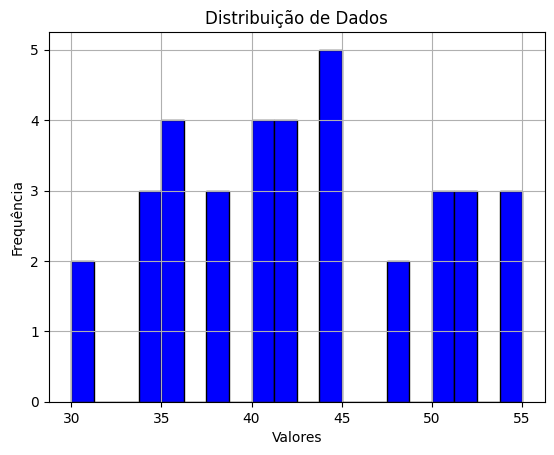


p > alpha --> Aceita H0


True

In [ ]:
ShapiroWilk(ProdMaqAgric,0.05,36)

      Como o valor Wcalc >= Wcrítico, não podemos rejeitar a hipótese nula, ou seja, a amostra parece seguir a distribuição normal

### Distribuição Normal:


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  29.669388946674605
Variancia =  42.95462255920957
DesvioPadrao =  6.553977613572506
Mediana =  30.866471335076938
Minimo =  16.444982491772826
Maximo =  43.987274968129014
Soma =  1068.0980020802858
Contagem =  36


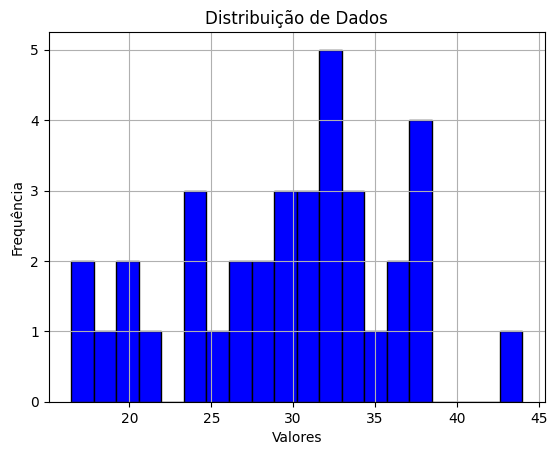


p > alpha --> Aceita H0


True

In [ ]:
ShapiroWilk(Normal,0.05,36)

      Como o valor Wcalc >= Wcrítico, não podemos rejeitar a hipótese nula, ou seja, a amostra parece seguir a distribuição normal

### Distribuição Gama:


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  3.758547452822097
Variancia =  4.848339151202209
DesvioPadrao =  2.2018944459719703
Mediana =  3.3315263254282055
Minimo =  0.8289060601502071
Maximo =  11.231270748741228
Soma =  135.30770830159548
Contagem =  36


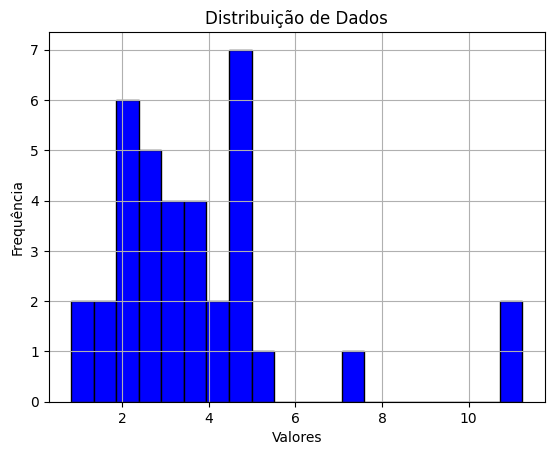


p < alpha --> Rejeita H0


False

In [ ]:
ShapiroWilk(gama,0.05,36)

      Como o valor Wcalc < Wcrítico, podemos rejeitar a hipótese nula, ou seja, podemos rejeitar a hipótese H0(nula)

### Distribuição de Cauchy:


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  1.712065224943388
Variancia =  94.259432076162
DesvioPadrao =  9.708729683957731
Mediana =  0.3308781442141231
Minimo =  -6.552536363069683
Maximo =  57.236464955146054
Soma =  61.63434809796197
Contagem =  36


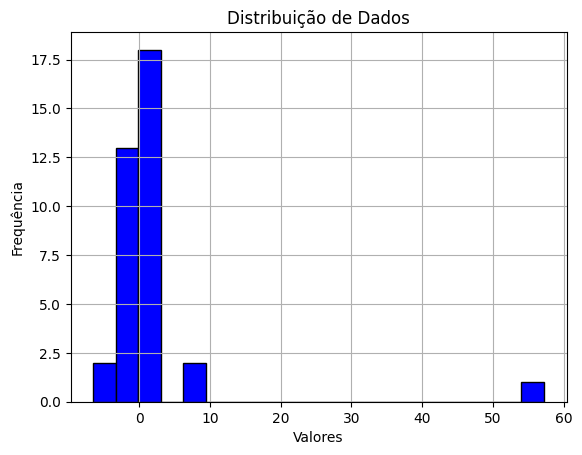


p < alpha --> Rejeita H0


False

In [ ]:
ShapiroWilk(cauchy,0.05,36)

      Como o valor Wcalc < Wcrítico, podemos rejeitar a hipótese nula H0().

### Teste na função da biblioteca

In [ ]:
from scipy.stats import shapiro

# Função para teste de Shapiro-Wilk automático
def teste_shapiro_wilk_automatico(data):
    for nome, conjunto in data.items():
        print(f"\nTestando o conjunto de dados '{nome}':")
        stat, p = shapiro(conjunto)
        if p > 0.05:
            print("Resultado: A amostra parece seguir uma distribuição normal.")
        else:
            print("Resultado: A amostra não parece seguir uma distribuição normal.")

# Casos de teste
casos_teste = {
    "ProdMaqAgric": np.array([52, 50, 36, 40, 30, 42, 38, 38, 52, 44, 36, 34, 50, 42, 34, 55, 36, 55, 42, 52, 34, 48, 55, 44, 44, 30, 48, 40, 40, 44, 40, 44, 38, 36, 50, 42]),
    "Normal": np.random.normal(30, 5, 36),
    "gama": np.random.gamma(2, 2, 36),
    "cauchy": np.random.standard_cauchy(36)
}

# Executando o teste de Shapiro-Wilk automaticamente
teste_shapiro_wilk_automatico(casos_teste)



Testando o conjunto de dados 'ProdMaqAgric':
Resultado: A amostra parece seguir uma distribuição normal.

Testando o conjunto de dados 'Normal':
Resultado: A amostra parece seguir uma distribuição normal.

Testando o conjunto de dados 'gama':
Resultado: A amostra não parece seguir uma distribuição normal.

Testando o conjunto de dados 'cauchy':
Resultado: A amostra não parece seguir uma distribuição normal.


### Resumo resultados Shapiro-Wilk

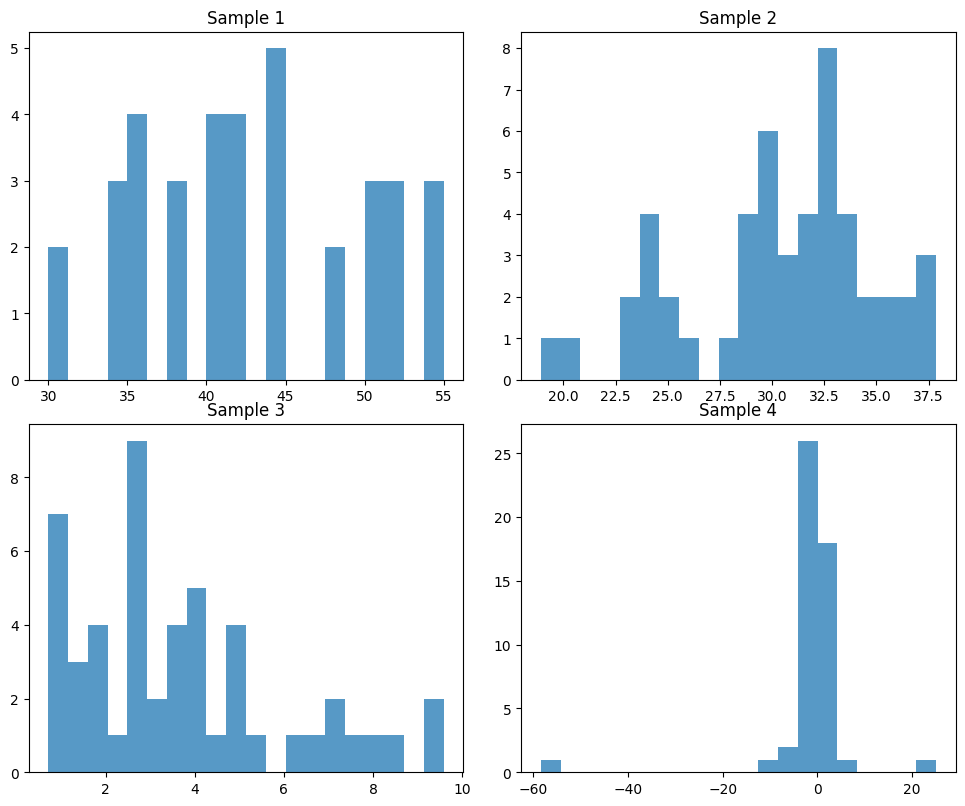

In [ ]:
plot_hist(ProdMaqAgric, Normal, gama, cauchy)



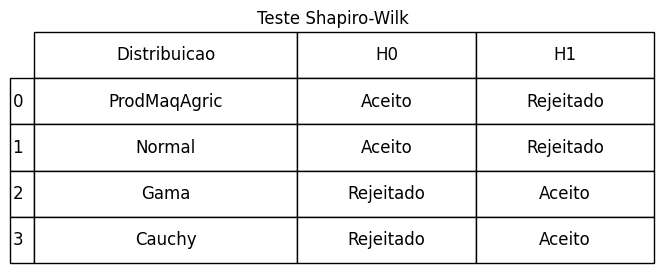

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supondo que temos os seguintes dados para a tabela
dados = {
    "Distribuicao": ["ProdMaqAgric", "Normal", "Gama", "Cauchy"],
    "H0": ["Aceito", "Aceito", "Rejeitado", "Rejeitado"],
    "H1": ["Rejeitado", "Rejeitado", "Aceito", "Aceito"]
}

# Convertendo os dados para um DataFrame do pandas
df = pd.DataFrame(dados)

# Criando uma figura sem eixos para a plotagem da tabela
fig, ax = plt.subplots(figsize=(8, 3)) # Você pode ajustar o tamanho conforme necessário
ax.axis('off') # Esconde os eixos

# Plotando a tabela
# O loc='center' centraliza a tabela na figura
# O bbox_to_anchor ajusta a posição da tabela dentro da figura
tbl = table(ax, df, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

# Ajustando o estilo da tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(12) # Ajusta o tamanho da fonte
tbl.auto_set_column_width(col=list(range(len(df.columns)))) # Ajusta a largura das colunas

plt.title("Teste Shapiro-Wilk") # Adiciona um título, se desejado

plt.show()

### Alguns testes em amostras adicionais


Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.47992983614502865
Variancia =  0.08931904801527282
DesvioPadrao =  0.29886292512667545
Mediana =  0.4966213559002903
Minimo =  0.0035200215556553394
Maximo =  0.9878560263972094
Soma =  17.27747410122103
Contagem =  36


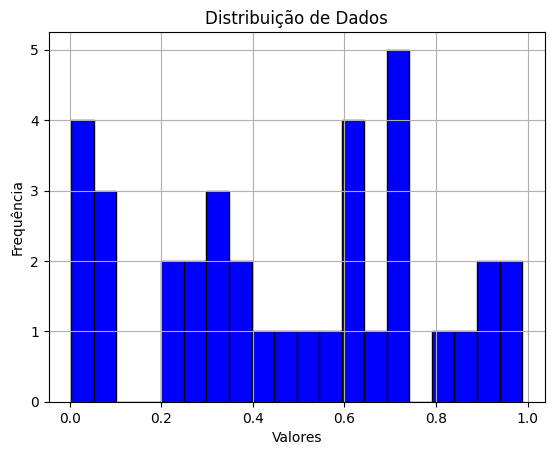


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5172533868865276
Variancia =  0.09859758221380692
DesvioPadrao =  0.31400251943862956
Mediana =  0.5613282922943195
Minimo =  0.01696594990369449
Maximo =  0.9922698782347654
Soma =  18.62112192791499
Contagem =  36


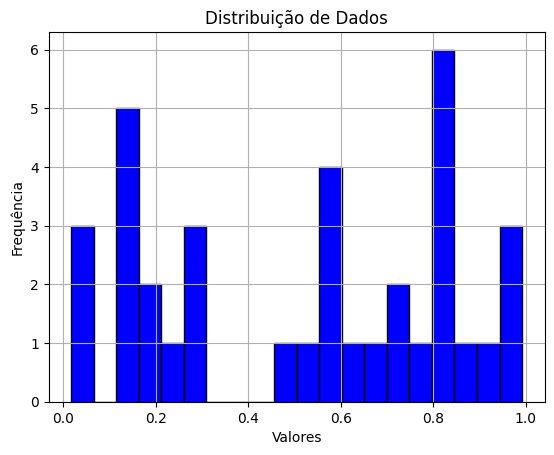


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5172533868865276
Variancia =  0.09859758221380692
DesvioPadrao =  0.31400251943862956
Mediana =  0.5613282922943195
Minimo =  0.01696594990369449
Maximo =  0.9922698782347654
Soma =  18.62112192791499
Contagem =  36


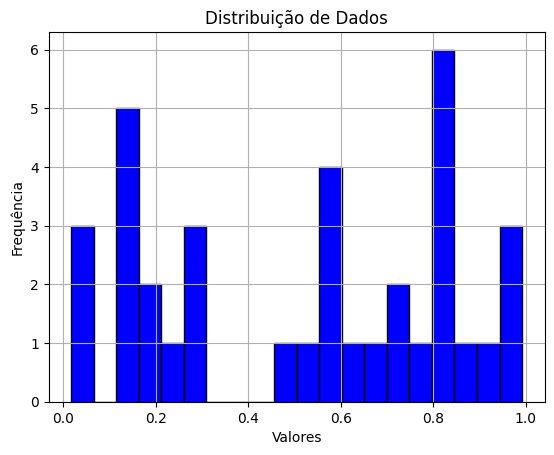


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4400274632432791
Variancia =  0.1044850292565635
DesvioPadrao =  0.3232414411188075
Mediana =  0.3870614798502188
Minimo =  0.0033752976811758373
Maximo =  0.9786307823095775
Soma =  15.840988676758048
Contagem =  36


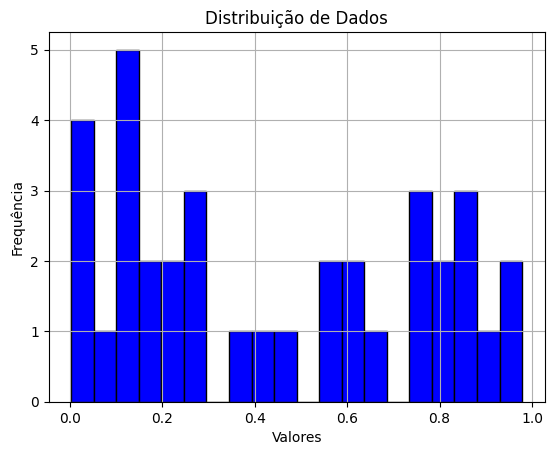


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4400274632432791
Variancia =  0.1044850292565635
DesvioPadrao =  0.3232414411188075
Mediana =  0.3870614798502188
Minimo =  0.0033752976811758373
Maximo =  0.9786307823095775
Soma =  15.840988676758048
Contagem =  36


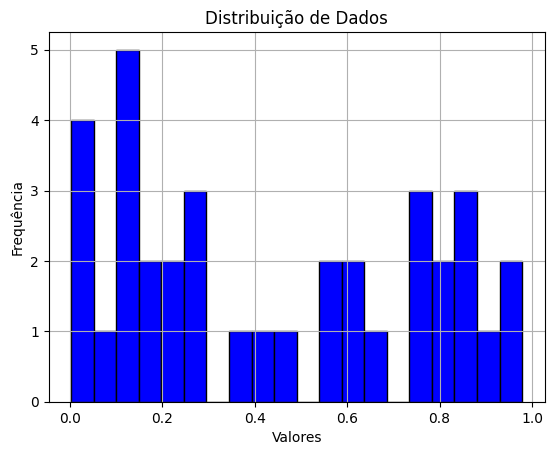


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5267239434680405
Variancia =  0.08073197614739465
DesvioPadrao =  0.2841337293377797
Mediana =  0.49423479887371247
Minimo =  0.03671049780982649
Maximo =  0.9975233006207741
Soma =  18.962061964849457
Contagem =  36


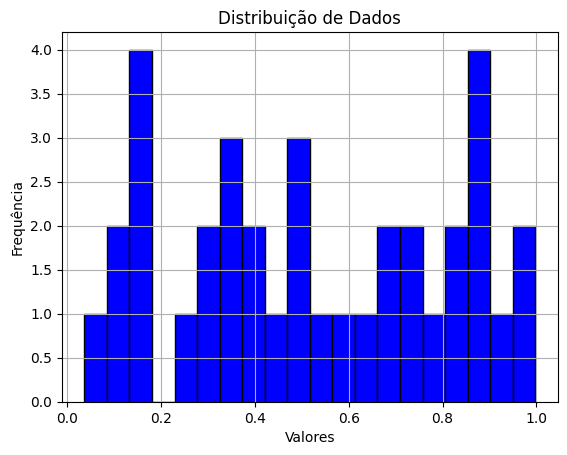


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.44812201674418833
Variancia =  0.07192879392820006
DesvioPadrao =  0.26819543979754773
Mediana =  0.3976040381745806
Minimo =  0.0019901232900049193
Maximo =  0.9311075855605101
Soma =  16.13239260279078
Contagem =  36


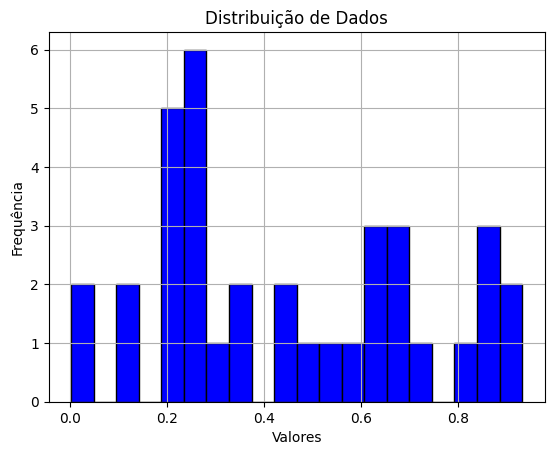


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.44812201674418833
Variancia =  0.07192879392820006
DesvioPadrao =  0.26819543979754773
Mediana =  0.3976040381745806
Minimo =  0.0019901232900049193
Maximo =  0.9311075855605101
Soma =  16.13239260279078
Contagem =  36


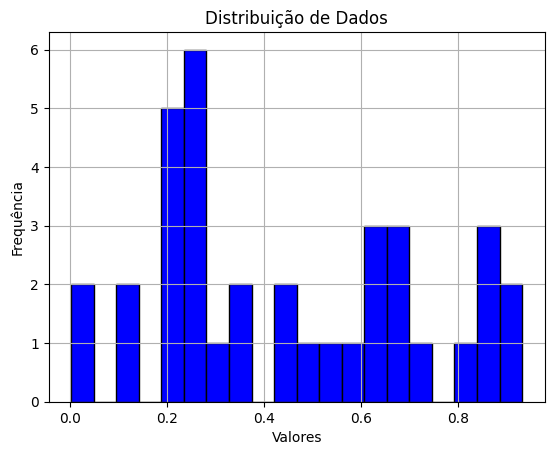


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5969710131037007
Variancia =  0.06632156342933991
DesvioPadrao =  0.25752973309763655
Mediana =  0.6650399817947065
Minimo =  0.04997414618519258
Maximo =  0.9714057433624124
Soma =  21.490956471733224
Contagem =  36


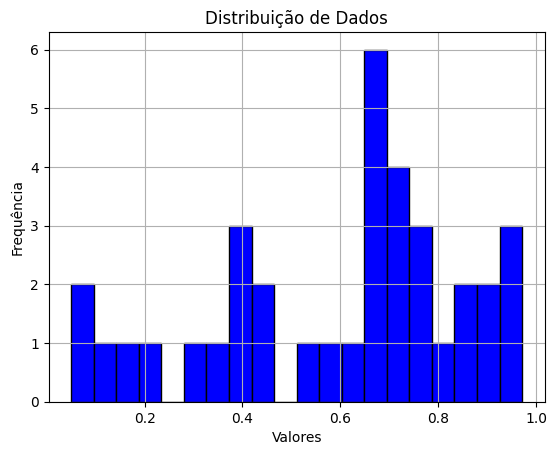


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5969710131037007
Variancia =  0.06632156342933991
DesvioPadrao =  0.25752973309763655
Mediana =  0.6650399817947065
Minimo =  0.04997414618519258
Maximo =  0.9714057433624124
Soma =  21.490956471733224
Contagem =  36


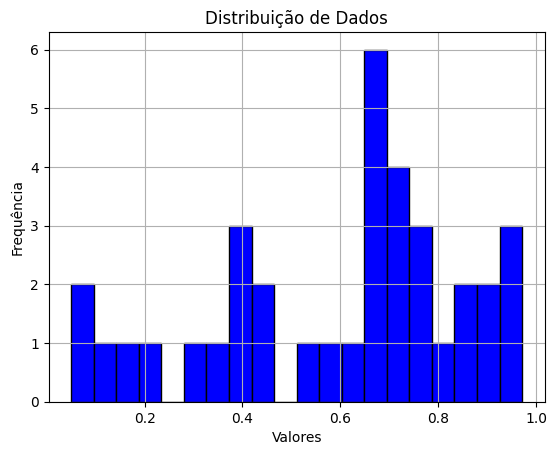


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4304612726783807
Variancia =  0.07181452096022813
DesvioPadrao =  0.2679823146407765
Mediana =  0.40106049414567874
Minimo =  0.01872800759459836
Maximo =  0.9785533253697828
Soma =  15.496605816421704
Contagem =  36


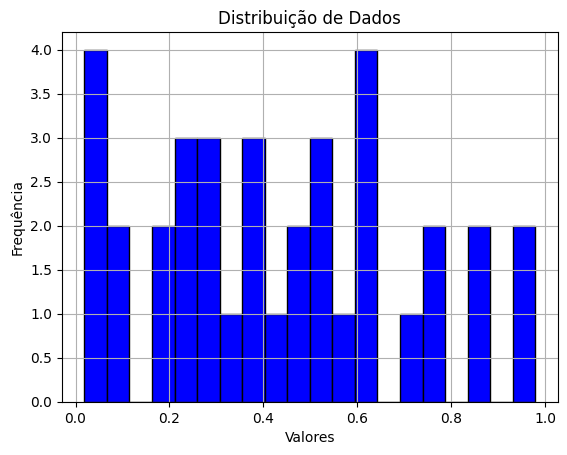


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.48638158095011175
Variancia =  0.0921141235932167
DesvioPadrao =  0.30350308662881287
Mediana =  0.44386916491851336
Minimo =  0.024042007295392742
Maximo =  0.9992482090061794
Soma =  17.509736914204023
Contagem =  36


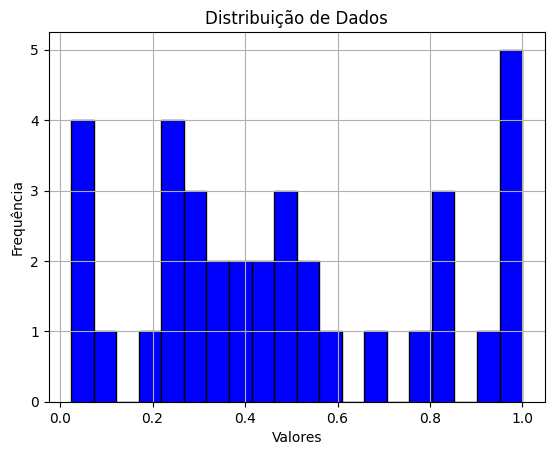


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.48638158095011175
Variancia =  0.0921141235932167
DesvioPadrao =  0.30350308662881287
Mediana =  0.44386916491851336
Minimo =  0.024042007295392742
Maximo =  0.9992482090061794
Soma =  17.509736914204023
Contagem =  36


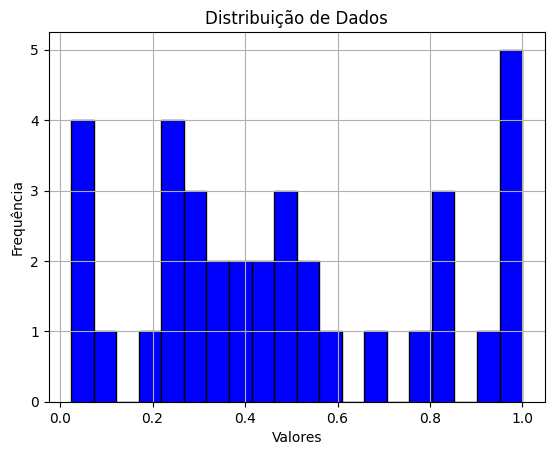


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.47740240771729475
Variancia =  0.07413419295778449
DesvioPadrao =  0.2722759500172288
Mediana =  0.46476434142210077
Minimo =  0.005632396552023189
Maximo =  0.9867191688075044
Soma =  17.18648667782261
Contagem =  36


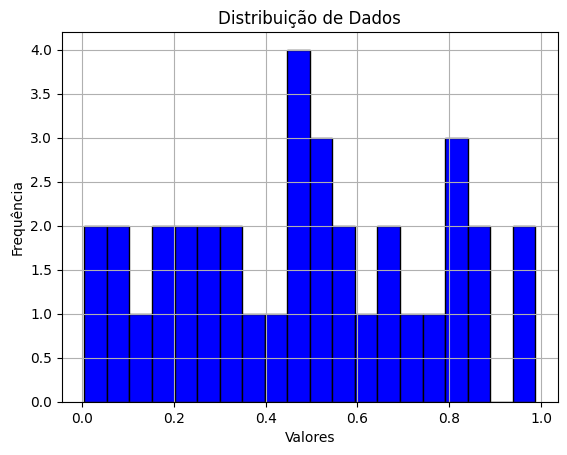


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5033422648372968
Variancia =  0.09386488565856595
DesvioPadrao =  0.3063737679021589
Mediana =  0.587890918512043
Minimo =  0.001997061333798955
Maximo =  0.9196614861067408
Soma =  18.120321534142686
Contagem =  36


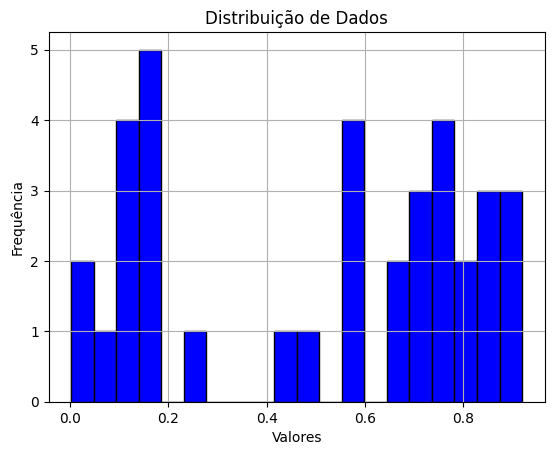


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5033422648372968
Variancia =  0.09386488565856595
DesvioPadrao =  0.3063737679021589
Mediana =  0.587890918512043
Minimo =  0.001997061333798955
Maximo =  0.9196614861067408
Soma =  18.120321534142686
Contagem =  36


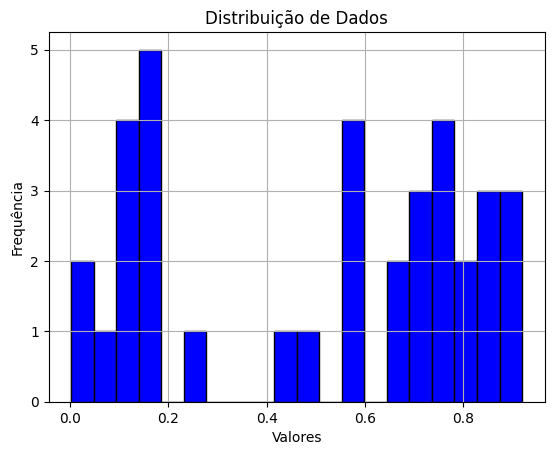


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.47227317316676587
Variancia =  0.07218623946091772
DesvioPadrao =  0.2686749699188924
Mediana =  0.4443947021539202
Minimo =  0.003351962103277595
Maximo =  0.9467793648878653
Soma =  17.00183423400357
Contagem =  36


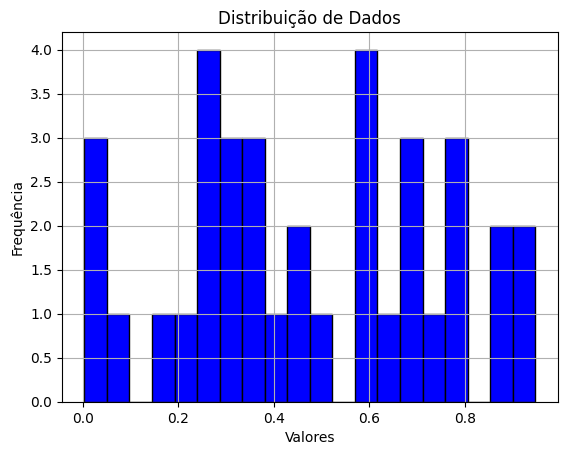


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5133506289855111
Variancia =  0.06782467577997137
DesvioPadrao =  0.2604317103963559
Mediana =  0.5385077517475622
Minimo =  0.0584829086213996
Maximo =  0.9725306604181282
Soma =  18.480622643478398
Contagem =  36


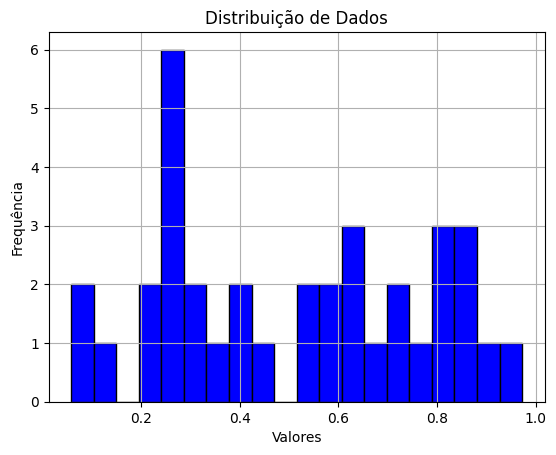


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4763496364172849
Variancia =  0.07874496376009485
DesvioPadrao =  0.2806153305863649
Mediana =  0.5363194482404792
Minimo =  0.009988290736744232
Maximo =  0.9993991143628423
Soma =  17.148586911022257
Contagem =  36


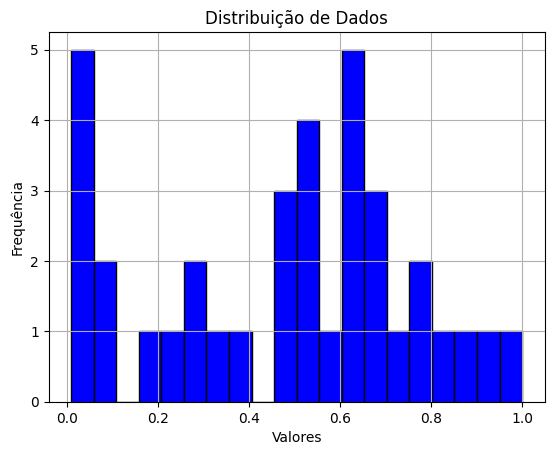


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5944270933743175
Variancia =  0.07677665750805146
DesvioPadrao =  0.2770860110291594
Mediana =  0.6828474886568832
Minimo =  0.0017983533042523758
Maximo =  0.943668402532177
Soma =  21.399375361475432
Contagem =  36


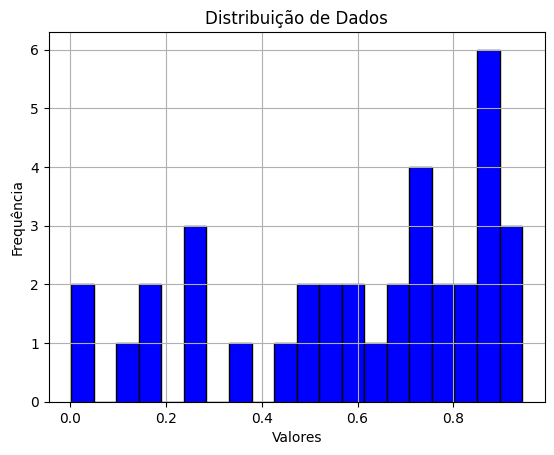


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5944270933743175
Variancia =  0.07677665750805146
DesvioPadrao =  0.2770860110291594
Mediana =  0.6828474886568832
Minimo =  0.0017983533042523758
Maximo =  0.943668402532177
Soma =  21.399375361475432
Contagem =  36


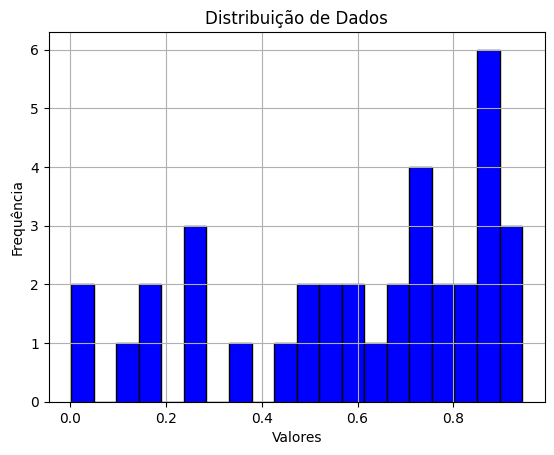


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.48412548306668285
Variancia =  0.07088540546947572
DesvioPadrao =  0.26624313224846896
Mediana =  0.5245798930579602
Minimo =  0.001964653812372319
Maximo =  0.9238757725638891
Soma =  17.428517390400582
Contagem =  36


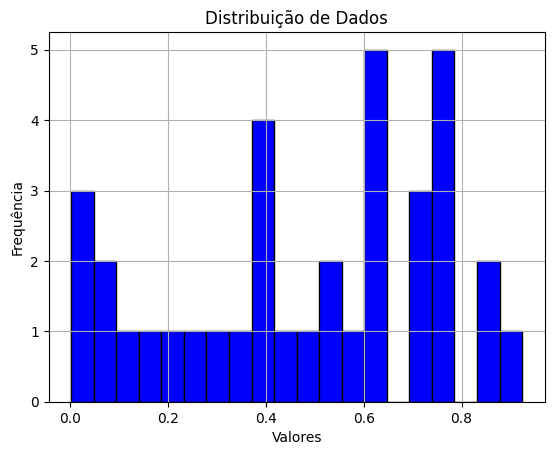


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5500107004739577
Variancia =  0.07532911541740879
DesvioPadrao =  0.27446150079275017
Mediana =  0.6028202745228246
Minimo =  0.04860801472096854
Maximo =  0.974143780374749
Soma =  19.800385217062477
Contagem =  36


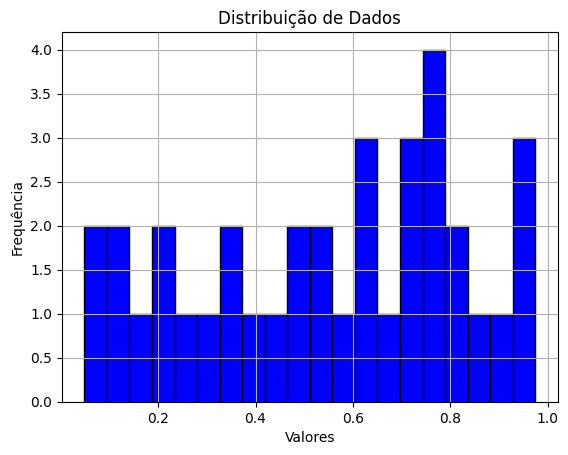


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4661533315292692
Variancia =  0.08602227619887019
DesvioPadrao =  0.2932955441169712
Mediana =  0.47753949028192305
Minimo =  0.006556816536422261
Maximo =  0.9534062062876562
Soma =  16.78151993505369
Contagem =  36


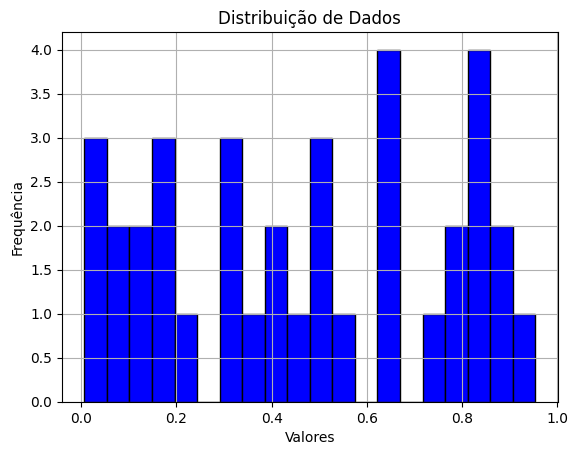


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4661533315292692
Variancia =  0.08602227619887019
DesvioPadrao =  0.2932955441169712
Mediana =  0.47753949028192305
Minimo =  0.006556816536422261
Maximo =  0.9534062062876562
Soma =  16.78151993505369
Contagem =  36


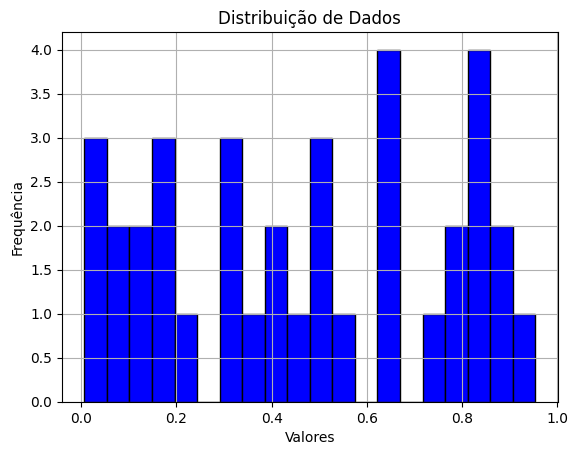


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4336723020877592
Variancia =  0.06417061893846576
DesvioPadrao =  0.25331920365117555
Mediana =  0.4082381816118186
Minimo =  0.029736915100703087
Maximo =  0.9000606855820243
Soma =  15.612202875159332
Contagem =  36


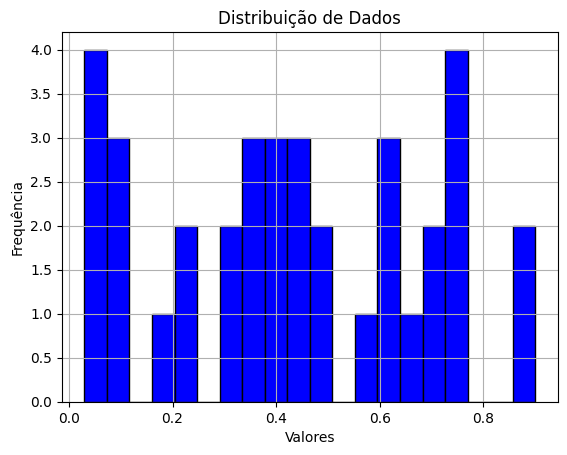


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.483344825372239
Variancia =  0.0890313299294694
DesvioPadrao =  0.2983811822643469
Mediana =  0.4503199576151803
Minimo =  0.010242268371071672
Maximo =  0.9694520512237215
Soma =  17.400413713400603
Contagem =  36


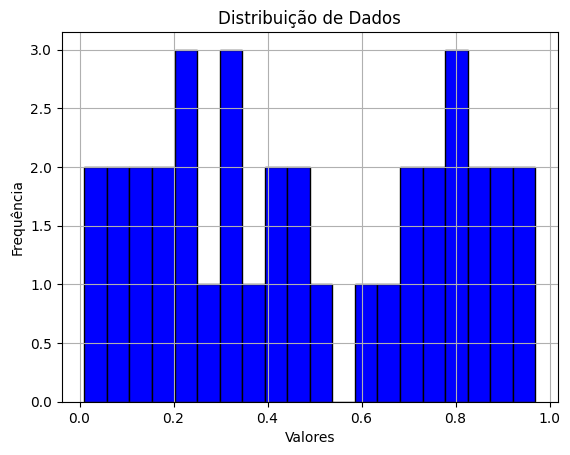


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.483344825372239
Variancia =  0.0890313299294694
DesvioPadrao =  0.2983811822643469
Mediana =  0.4503199576151803
Minimo =  0.010242268371071672
Maximo =  0.9694520512237215
Soma =  17.400413713400603
Contagem =  36


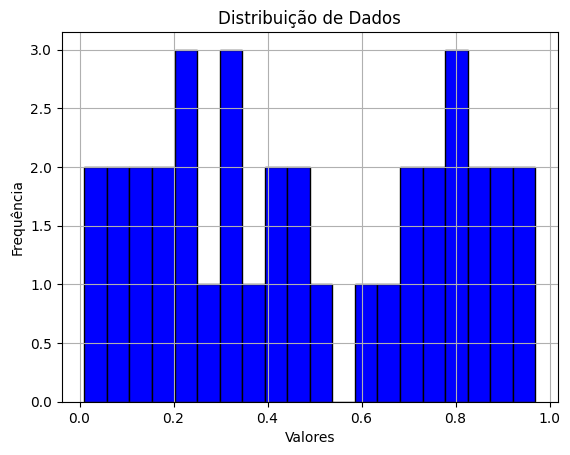


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5186778912032239
Variancia =  0.09102937674258398
DesvioPadrao =  0.30171075012764126
Mediana =  0.47046816634935235
Minimo =  0.05026977257838727
Maximo =  0.9962710413616611
Soma =  18.672404083316064
Contagem =  36


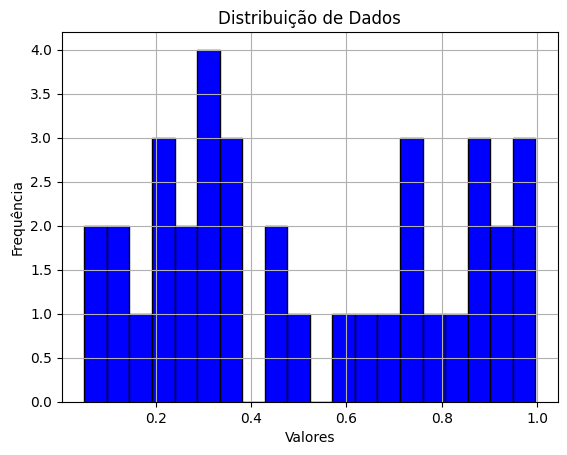


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5186778912032239
Variancia =  0.09102937674258398
DesvioPadrao =  0.30171075012764126
Mediana =  0.47046816634935235
Minimo =  0.05026977257838727
Maximo =  0.9962710413616611
Soma =  18.672404083316064
Contagem =  36


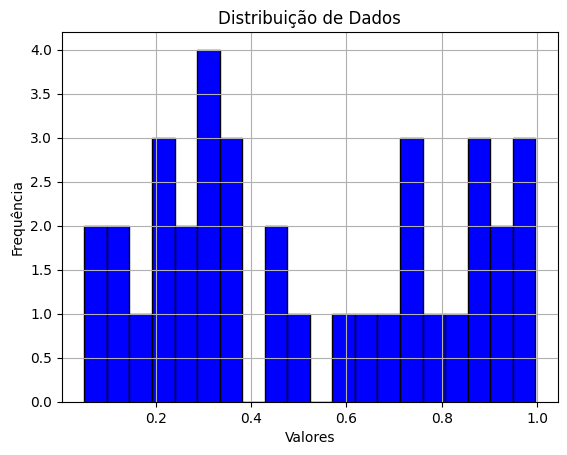


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5203505795315087
Variancia =  0.07190802455656775
DesvioPadrao =  0.2681567164114443
Mediana =  0.56145102783559
Minimo =  0.01622918984427224
Maximo =  0.9406205333493597
Soma =  18.73262086313431
Contagem =  36


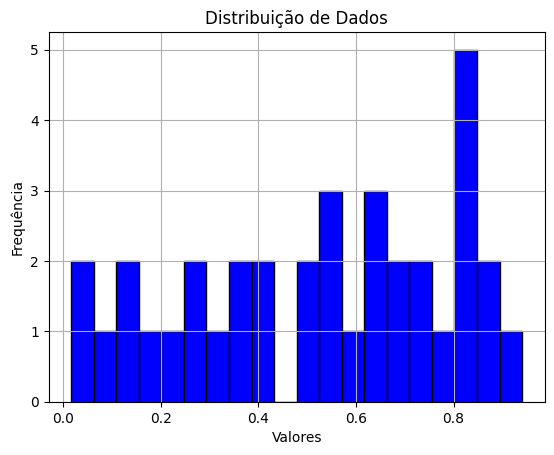


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.49584531967005163
Variancia =  0.0854176999204199
DesvioPadrao =  0.29226306629545223
Mediana =  0.5155720105365349
Minimo =  0.003632496336268609
Maximo =  0.9928340283924367
Soma =  17.850431508121858
Contagem =  36


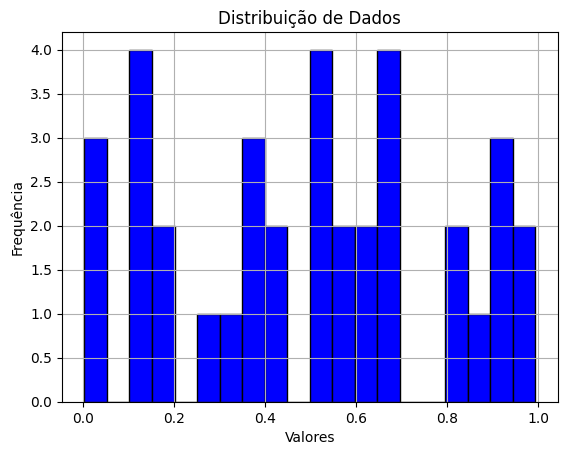


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4872885947866307
Variancia =  0.0721949944638418
DesvioPadrao =  0.26869126235112634
Mediana =  0.5109856088852588
Minimo =  0.03045630060453386
Maximo =  0.9716824424244137
Soma =  17.542389412318705
Contagem =  36


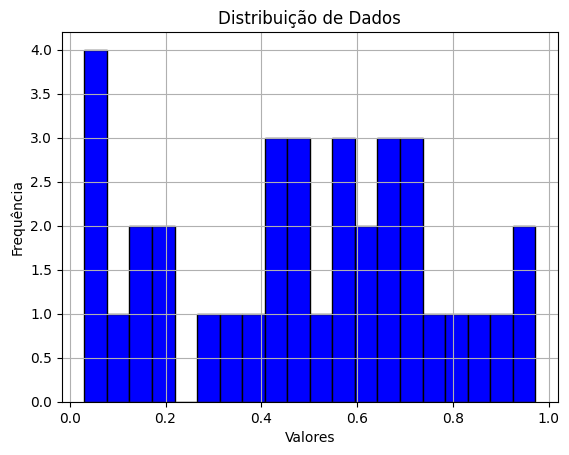


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5206098203699747
Variancia =  0.11124565993476236
DesvioPadrao =  0.33353509550684823
Mediana =  0.5442291118179742
Minimo =  0.007787601190394455
Maximo =  0.9940954378808611
Soma =  18.74195353331909
Contagem =  36


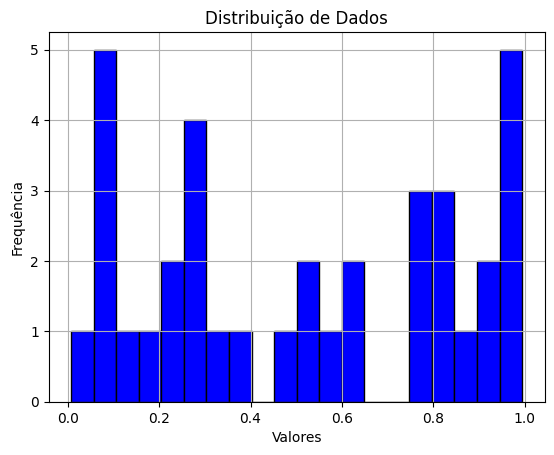


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5206098203699747
Variancia =  0.11124565993476236
DesvioPadrao =  0.33353509550684823
Mediana =  0.5442291118179742
Minimo =  0.007787601190394455
Maximo =  0.9940954378808611
Soma =  18.74195353331909
Contagem =  36


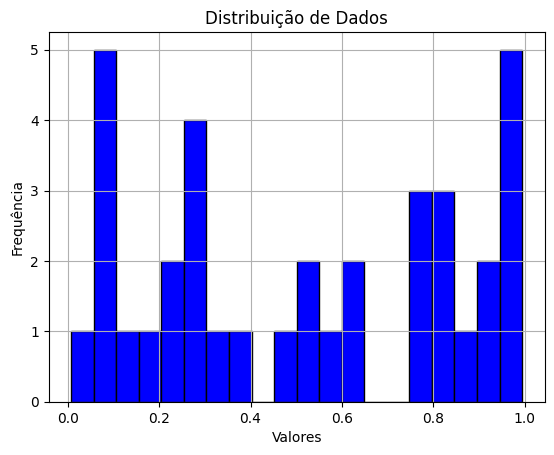


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.39911612506155597
Variancia =  0.08052998528903046
DesvioPadrao =  0.28377805639095927
Mediana =  0.3378398997249235
Minimo =  0.0017142638971165969
Maximo =  0.9731922134784249
Soma =  14.368180502216015
Contagem =  36


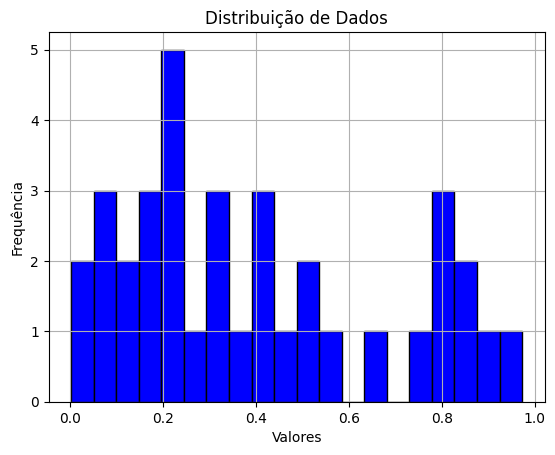


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.39911612506155597
Variancia =  0.08052998528903046
DesvioPadrao =  0.28377805639095927
Mediana =  0.3378398997249235
Minimo =  0.0017142638971165969
Maximo =  0.9731922134784249
Soma =  14.368180502216015
Contagem =  36


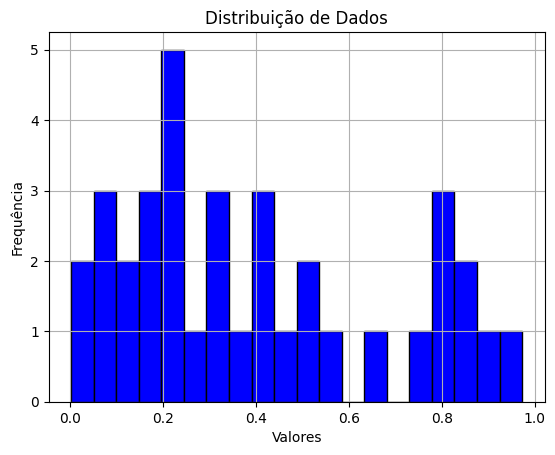


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4184529560690299
Variancia =  0.05671722846591319
DesvioPadrao =  0.2381537916261532
Mediana =  0.35838983528398005
Minimo =  0.045214476187065755
Maximo =  0.9684155615673817
Soma =  15.064306418485076
Contagem =  36


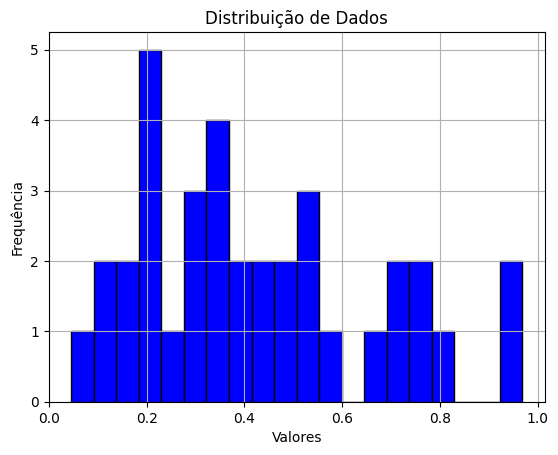


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4761761693711455
Variancia =  0.08189258073470541
DesvioPadrao =  0.286168797625991
Mediana =  0.4763431204366623
Minimo =  0.008809003170203278
Maximo =  0.9776823175967038
Soma =  17.142342097361237
Contagem =  36


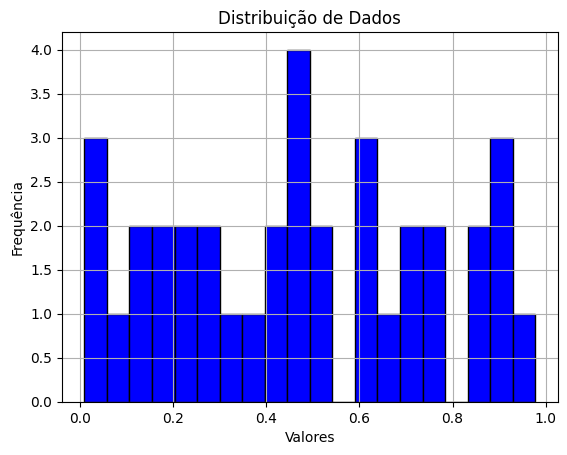


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5293329770692851
Variancia =  0.06939271806698587
DesvioPadrao =  0.26342497616396565
Mediana =  0.5824619310007965
Minimo =  0.03921681320351045
Maximo =  0.9897648529060888
Soma =  19.055987174494263
Contagem =  36


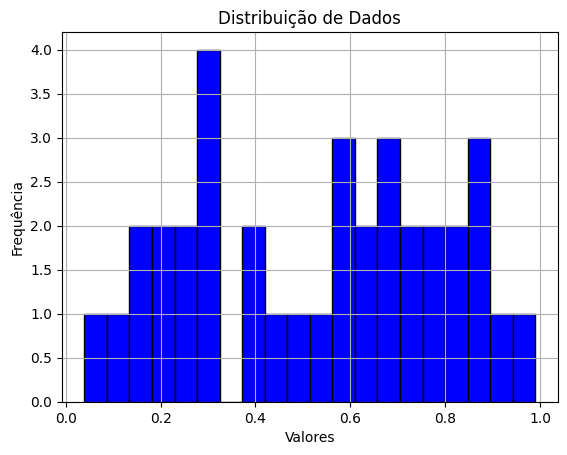


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5105382890741234
Variancia =  0.06898508521855322
DesvioPadrao =  0.26265011939565763
Mediana =  0.4905159277549395
Minimo =  0.021796830081325602
Maximo =  0.952178107319421
Soma =  18.37937840666844
Contagem =  36


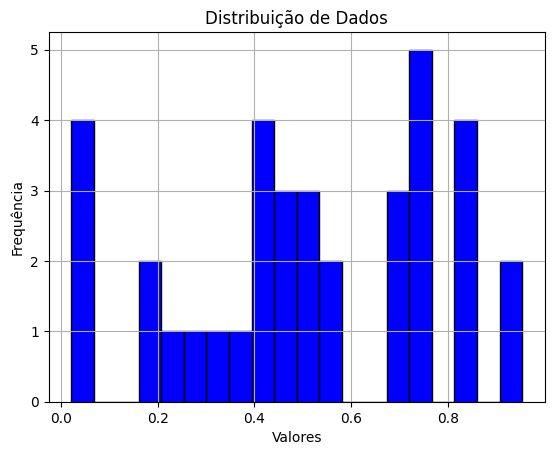


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.39331840553263686
Variancia =  0.0887687244939842
DesvioPadrao =  0.2979408070304976
Mediana =  0.3463922953161765
Minimo =  0.007541867704247585
Maximo =  0.9617177635765872
Soma =  14.159462599174926
Contagem =  36


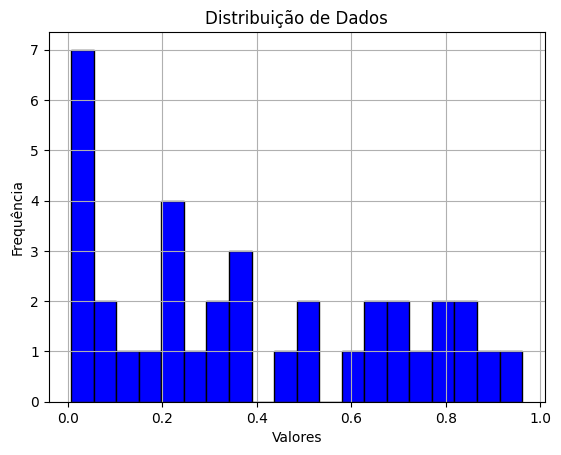


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.39331840553263686
Variancia =  0.0887687244939842
DesvioPadrao =  0.2979408070304976
Mediana =  0.3463922953161765
Minimo =  0.007541867704247585
Maximo =  0.9617177635765872
Soma =  14.159462599174926
Contagem =  36


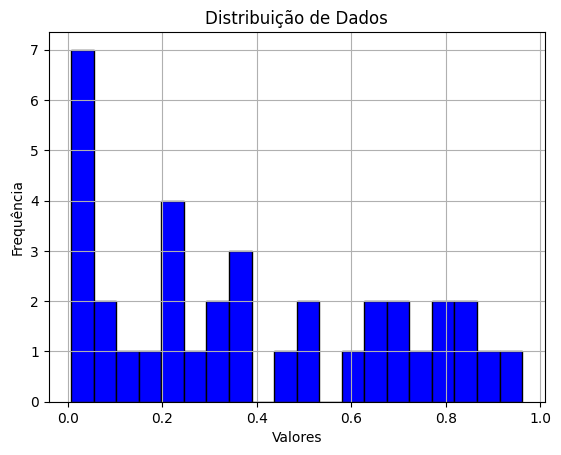


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5304780551555516
Variancia =  0.08042648583472158
DesvioPadrao =  0.28359563789790837
Mediana =  0.585029366296379
Minimo =  0.010243616881273065
Maximo =  0.9436501015827572
Soma =  19.097209985599857
Contagem =  36


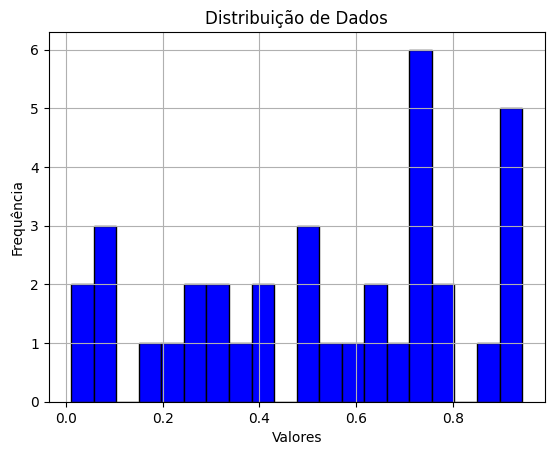


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5304780551555516
Variancia =  0.08042648583472158
DesvioPadrao =  0.28359563789790837
Mediana =  0.585029366296379
Minimo =  0.010243616881273065
Maximo =  0.9436501015827572
Soma =  19.097209985599857
Contagem =  36


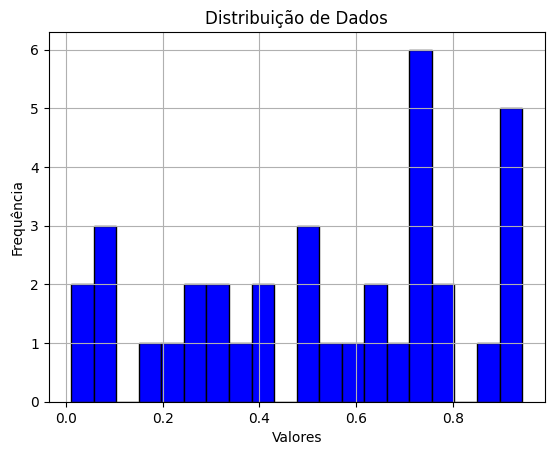


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5401889859629502
Variancia =  0.09042551311851951
DesvioPadrao =  0.300708352259327
Mediana =  0.6002032708172502
Minimo =  0.026488318195020177
Maximo =  0.9656128631242008
Soma =  19.446803494666206
Contagem =  36


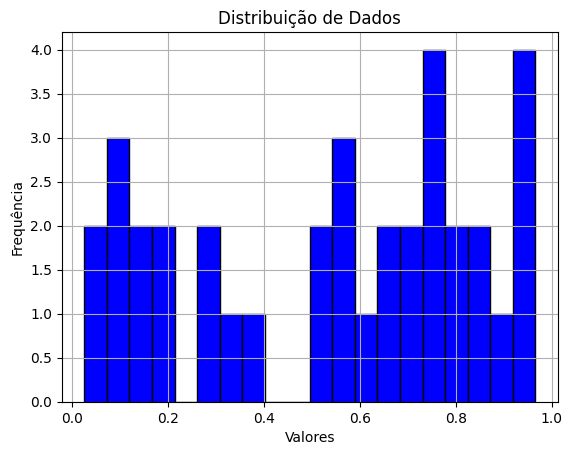


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5401889859629502
Variancia =  0.09042551311851951
DesvioPadrao =  0.300708352259327
Mediana =  0.6002032708172502
Minimo =  0.026488318195020177
Maximo =  0.9656128631242008
Soma =  19.446803494666206
Contagem =  36


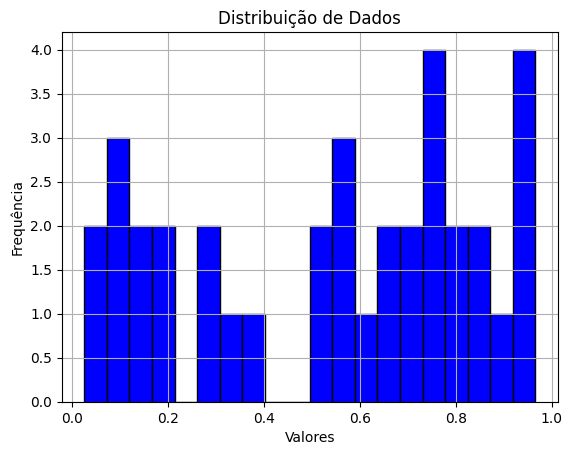


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5675193679228656
Variancia =  0.057054403381582436
DesvioPadrao =  0.23886063589796966
Mediana =  0.5779157284115441
Minimo =  0.10947565403189519
Maximo =  0.9873200131310401
Soma =  20.43069724522316
Contagem =  36


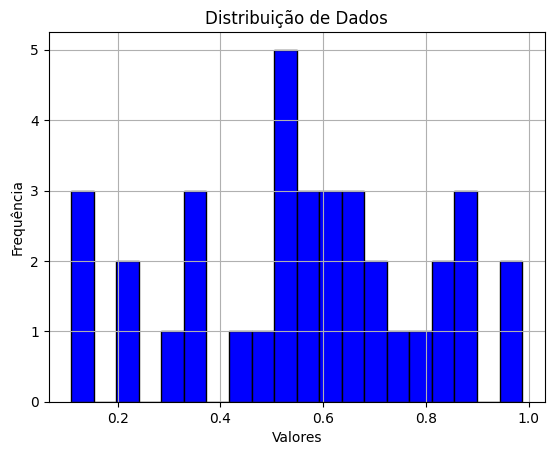


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.45420456238703427
Variancia =  0.07265546108237107
DesvioPadrao =  0.26954676974946495
Mediana =  0.47868026774747613
Minimo =  0.018535920954770413
Maximo =  0.9537936112677946
Soma =  16.351364245933233
Contagem =  36


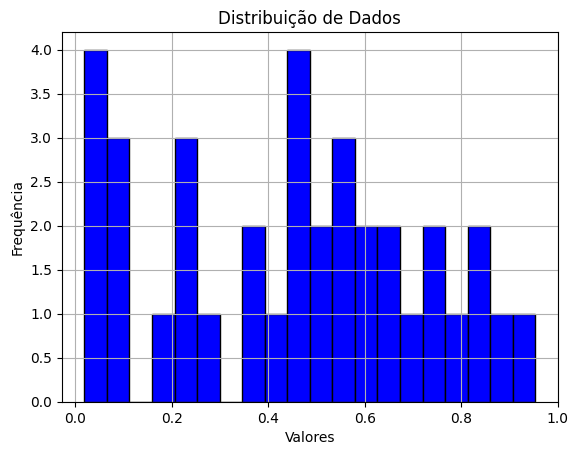


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.41961377059233035
Variancia =  0.0774242614482853
DesvioPadrao =  0.2782521544360175
Mediana =  0.38828399296874533
Minimo =  0.003724537176012177
Maximo =  0.9853390797351381
Soma =  15.106095741323893
Contagem =  36


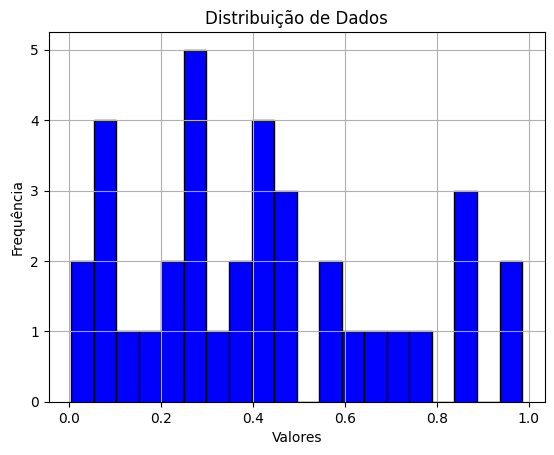


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.45585442081614347
Variancia =  0.07507935669641415
DesvioPadrao =  0.2740061252899543
Mediana =  0.47818900143646453
Minimo =  0.007446923176488318
Maximo =  0.9874557268988591
Soma =  16.410759149381164
Contagem =  36


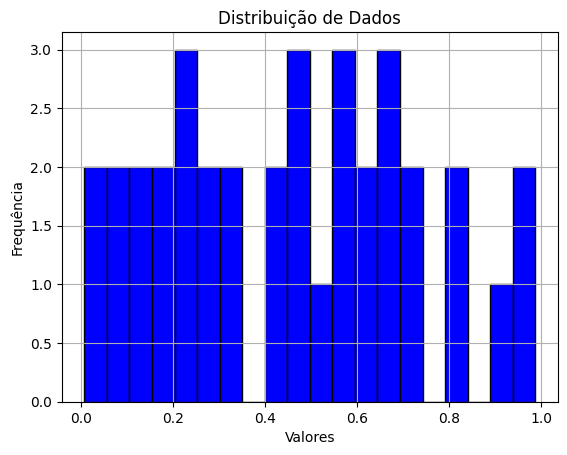


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5287765094706992
Variancia =  0.07475325969324143
DesvioPadrao =  0.273410423527051
Mediana =  0.5464664150430762
Minimo =  0.024675494604481818
Maximo =  0.9890432274280689
Soma =  19.03595434094517
Contagem =  36


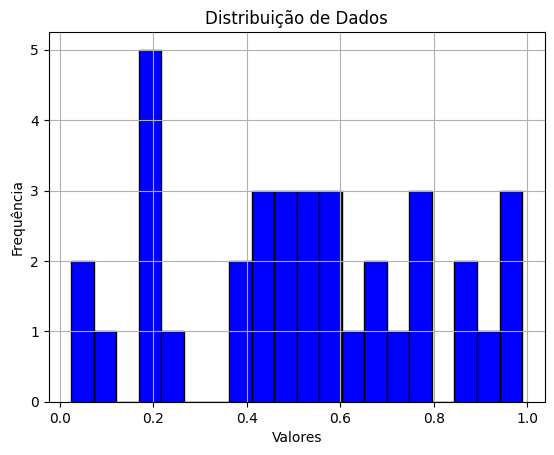


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5585831907416853
Variancia =  0.07672717292370773
DesvioPadrao =  0.2769967020087202
Mediana =  0.5343930642971498
Minimo =  0.003862927711545172
Maximo =  0.9657406735662368
Soma =  20.10899486670067
Contagem =  36


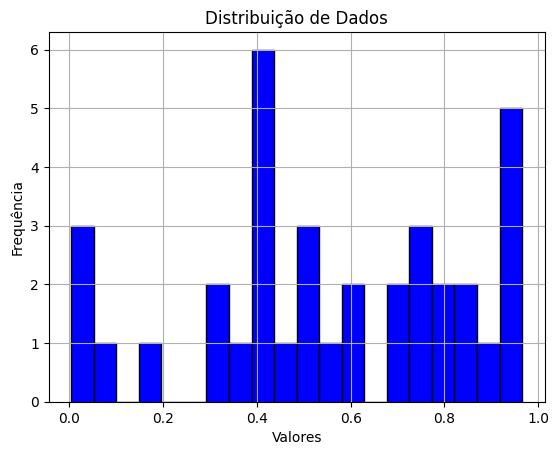


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4794967267027237
Variancia =  0.08122740516488453
DesvioPadrao =  0.28500421955628047
Mediana =  0.49242187610848565
Minimo =  0.02661031945955339
Maximo =  0.9435974746962993
Soma =  17.261882161298054
Contagem =  36


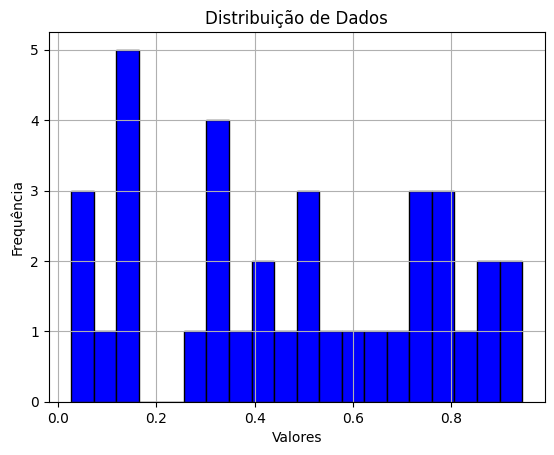


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.561148225837957
Variancia =  0.0887955643040575
DesvioPadrao =  0.29798584581160475
Mediana =  0.6118696212778978
Minimo =  0.023188960652618107
Maximo =  0.9949388339839044
Soma =  20.20133613016645
Contagem =  36


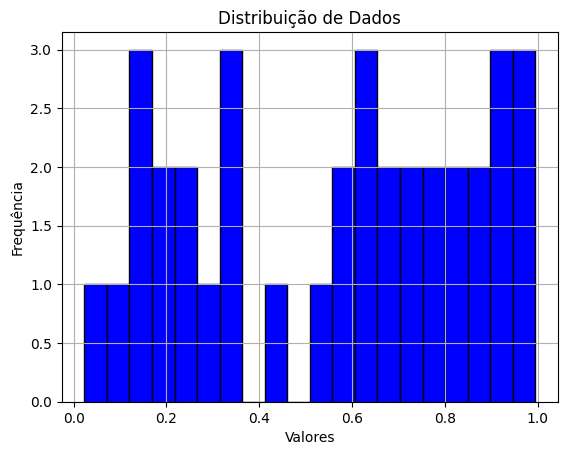


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.561148225837957
Variancia =  0.0887955643040575
DesvioPadrao =  0.29798584581160475
Mediana =  0.6118696212778978
Minimo =  0.023188960652618107
Maximo =  0.9949388339839044
Soma =  20.20133613016645
Contagem =  36


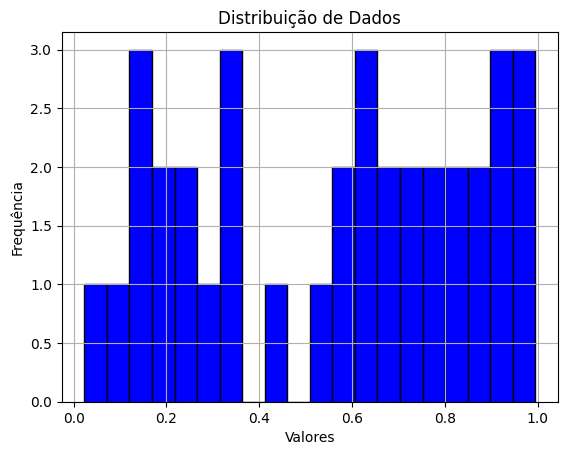


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5582777514330489
Variancia =  0.08359165714958777
DesvioPadrao =  0.2891222183603117
Mediana =  0.5093432846206991
Minimo =  0.025373073951159397
Maximo =  0.9786922882298275
Soma =  20.09799905158976
Contagem =  36


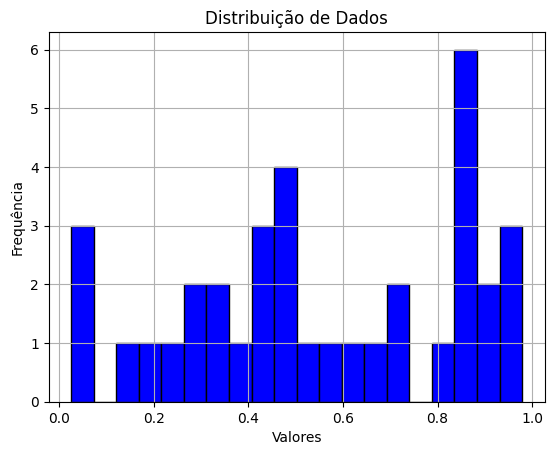


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5582777514330489
Variancia =  0.08359165714958777
DesvioPadrao =  0.2891222183603117
Mediana =  0.5093432846206991
Minimo =  0.025373073951159397
Maximo =  0.9786922882298275
Soma =  20.09799905158976
Contagem =  36


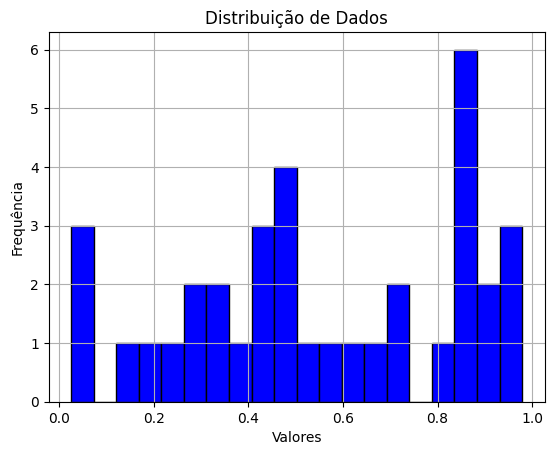


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.44575656368456085
Variancia =  0.10061766700274594
DesvioPadrao =  0.317202879877762
Mediana =  0.4464507272009232
Minimo =  0.00534831326212537
Maximo =  0.9873614062500745
Soma =  16.04723629264419
Contagem =  36


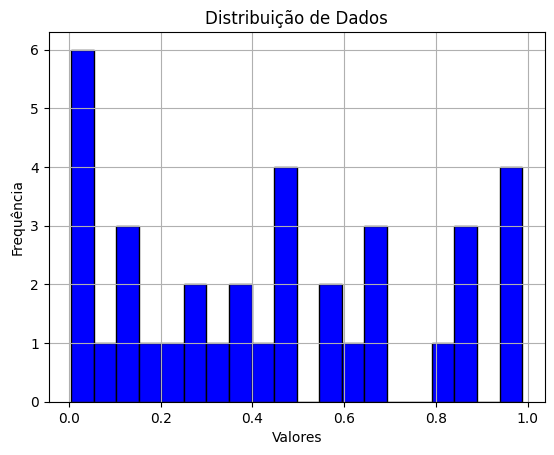


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.44575656368456085
Variancia =  0.10061766700274594
DesvioPadrao =  0.317202879877762
Mediana =  0.4464507272009232
Minimo =  0.00534831326212537
Maximo =  0.9873614062500745
Soma =  16.04723629264419
Contagem =  36


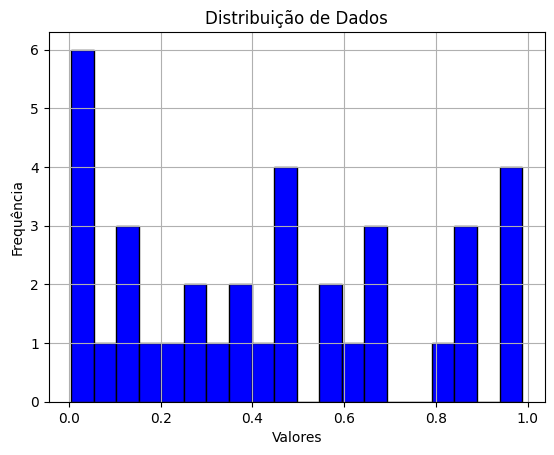


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5230201521610232
Variancia =  0.05254611544274743
DesvioPadrao =  0.2292293948051764
Mediana =  0.5494518519829438
Minimo =  0.09498354015113886
Maximo =  0.9818144720907445
Soma =  18.828725477796834
Contagem =  36


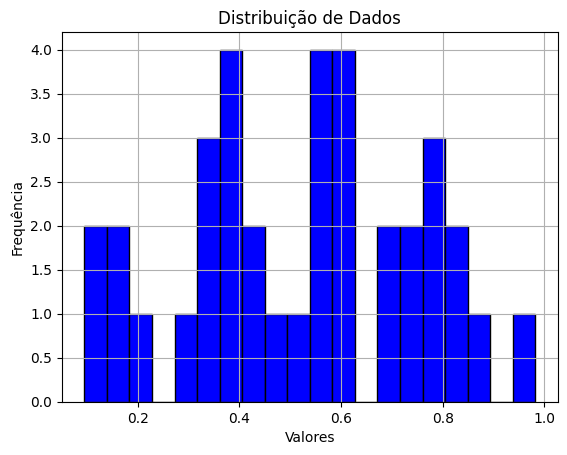


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.41253689211236827
Variancia =  0.04926864554671859
DesvioPadrao =  0.22196541520407764
Mediana =  0.43213044753751617
Minimo =  0.04590128248737457
Maximo =  0.8109822303930782
Soma =  14.851328116045257
Contagem =  36


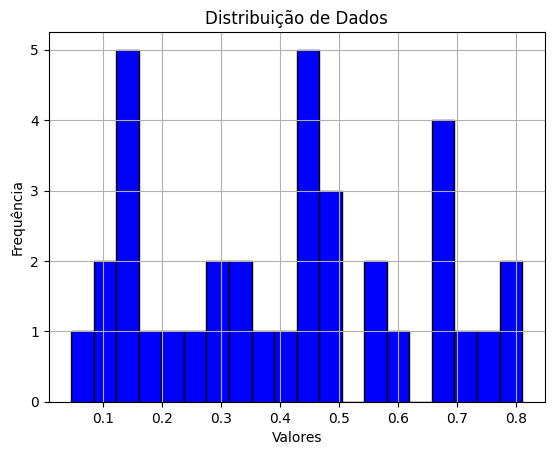


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4872785798377239
Variancia =  0.09047470396523129
DesvioPadrao =  0.3007901327590905
Mediana =  0.5111261271194172
Minimo =  0.051762104565290845
Maximo =  0.9787331256583777
Soma =  17.54202887415806
Contagem =  36


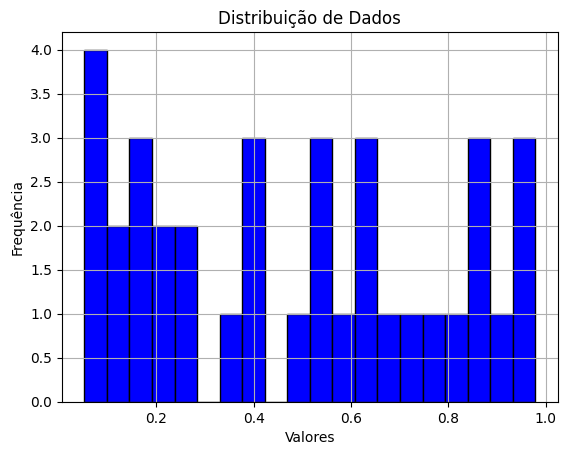


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4872785798377239
Variancia =  0.09047470396523129
DesvioPadrao =  0.3007901327590905
Mediana =  0.5111261271194172
Minimo =  0.051762104565290845
Maximo =  0.9787331256583777
Soma =  17.54202887415806
Contagem =  36


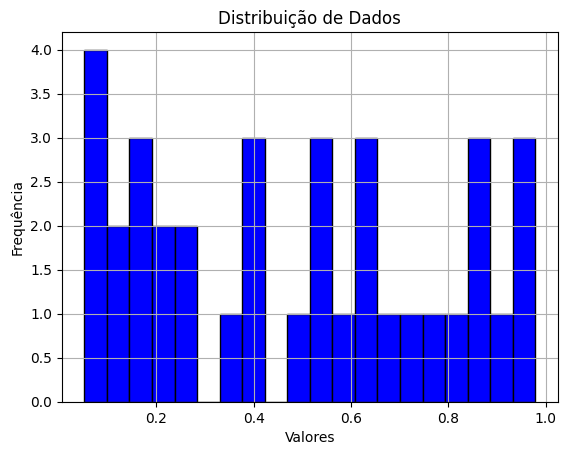


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5651603491028654
Variancia =  0.08755364901316835
DesvioPadrao =  0.2958946586425114
Mediana =  0.6356593160186799
Minimo =  0.00761880166341089
Maximo =  0.9858496451394193
Soma =  20.345772567703154
Contagem =  36


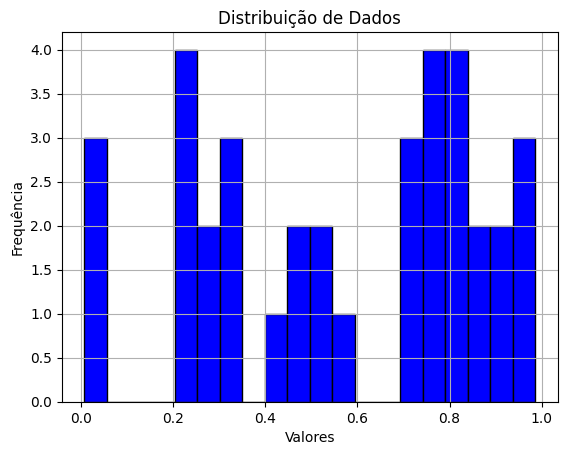


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5651603491028654
Variancia =  0.08755364901316835
DesvioPadrao =  0.2958946586425114
Mediana =  0.6356593160186799
Minimo =  0.00761880166341089
Maximo =  0.9858496451394193
Soma =  20.345772567703154
Contagem =  36


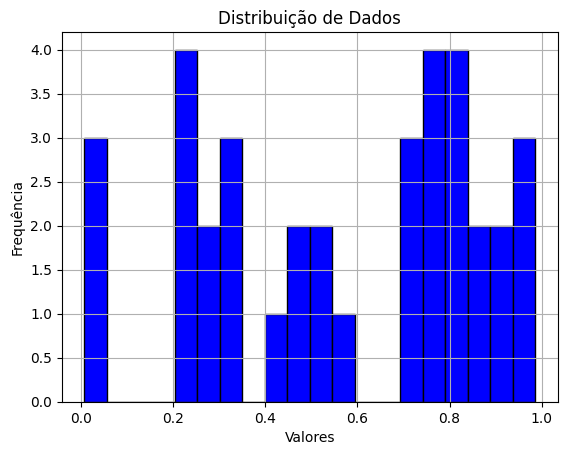


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4374170875600722
Variancia =  0.08076694242908457
DesvioPadrao =  0.2841952540579884
Mediana =  0.37794320055913
Minimo =  0.010865420210596777
Maximo =  0.994920133099161
Soma =  15.747015152162598
Contagem =  36


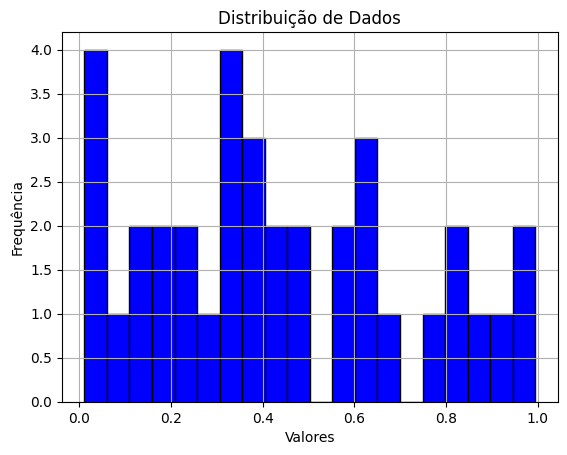


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5124771143622078
Variancia =  0.08513191530321583
DesvioPadrao =  0.2917737399136801
Mediana =  0.49120837244421584
Minimo =  0.0014586982992754738
Maximo =  0.9589747799725908
Soma =  18.44917611703948
Contagem =  36


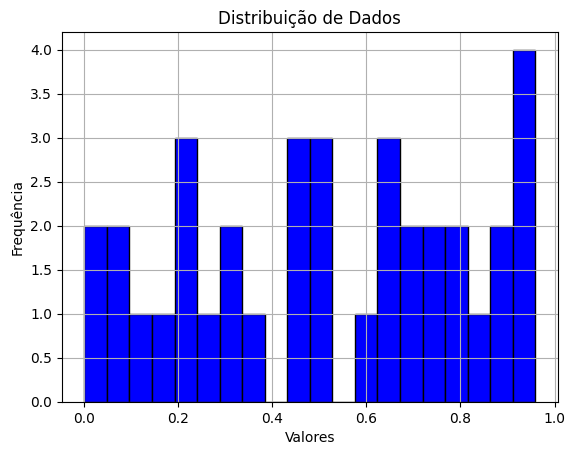


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5599663098902735
Variancia =  0.07994065668347823
DesvioPadrao =  0.2827377878591368
Mediana =  0.5745768763222412
Minimo =  0.04368320603602105
Maximo =  0.9990693795373095
Soma =  20.158787156049847
Contagem =  36


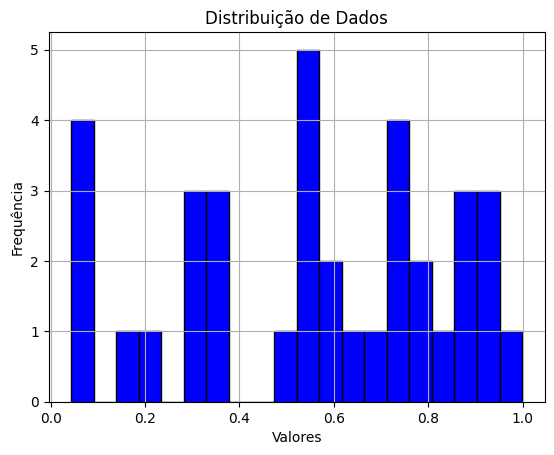


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5906059975690816
Variancia =  0.08291373351839709
DesvioPadrao =  0.2879474492305794
Mediana =  0.6457886486716738
Minimo =  0.008042715196579286
Maximo =  0.9956686066120645
Soma =  21.261815912486938
Contagem =  36


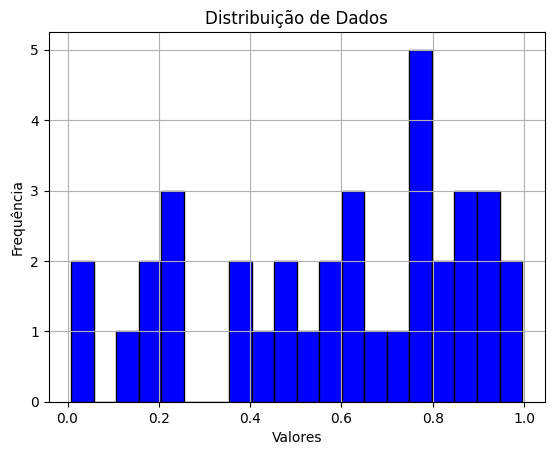


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5906059975690816
Variancia =  0.08291373351839709
DesvioPadrao =  0.2879474492305794
Mediana =  0.6457886486716738
Minimo =  0.008042715196579286
Maximo =  0.9956686066120645
Soma =  21.261815912486938
Contagem =  36


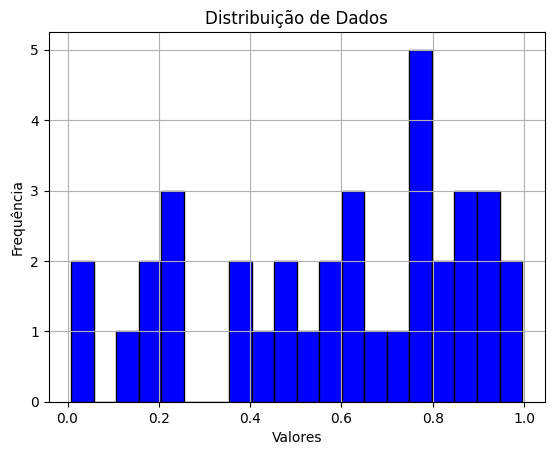


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.39727541017545454
Variancia =  0.08580065788905847
DesvioPadrao =  0.29291749331349004
Mediana =  0.33222361424651325
Minimo =  0.007379979295589312
Maximo =  0.9450249059015505
Soma =  14.301914766316363
Contagem =  36


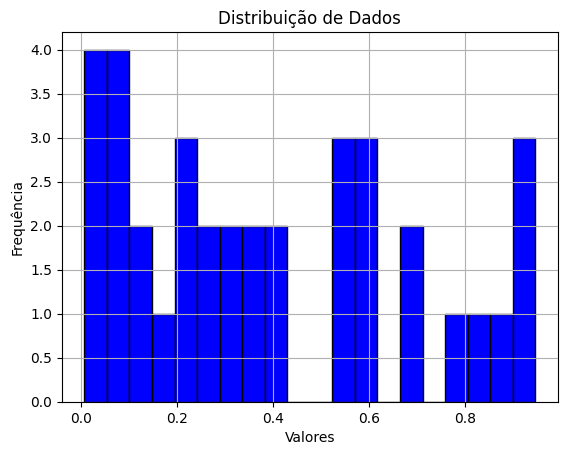


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.39727541017545454
Variancia =  0.08580065788905847
DesvioPadrao =  0.29291749331349004
Mediana =  0.33222361424651325
Minimo =  0.007379979295589312
Maximo =  0.9450249059015505
Soma =  14.301914766316363
Contagem =  36


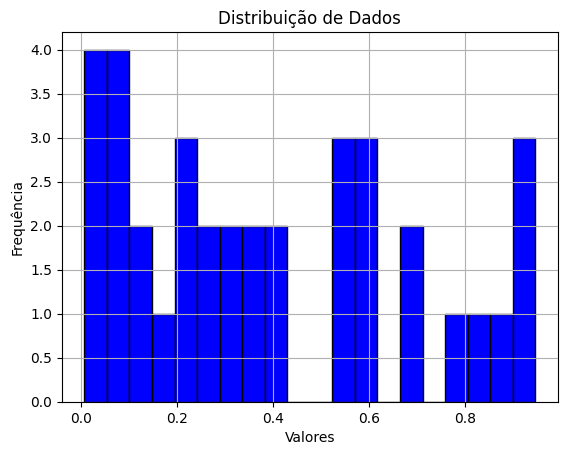


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.48029648162662714
Variancia =  0.08085699251808182
DesvioPadrao =  0.2843536398889274
Mediana =  0.46181588781242294
Minimo =  0.002185278919876632
Maximo =  0.9974925881621927
Soma =  17.290673338558577
Contagem =  36


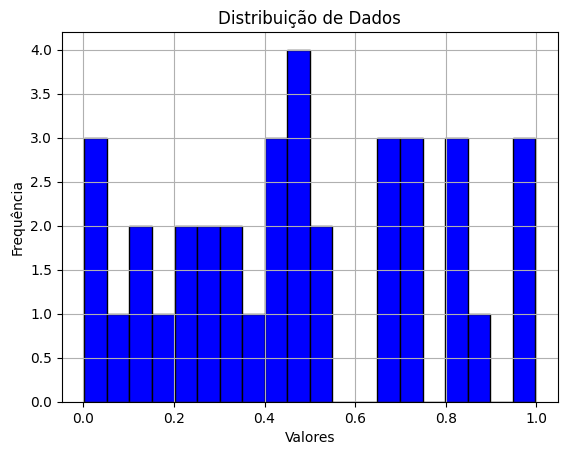


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4972151851467735
Variancia =  0.10154571360823064
DesvioPadrao =  0.31866238185300544
Mediana =  0.5401899586445793
Minimo =  0.028726798542305643
Maximo =  0.9950255816537196
Soma =  17.899746665283846
Contagem =  36


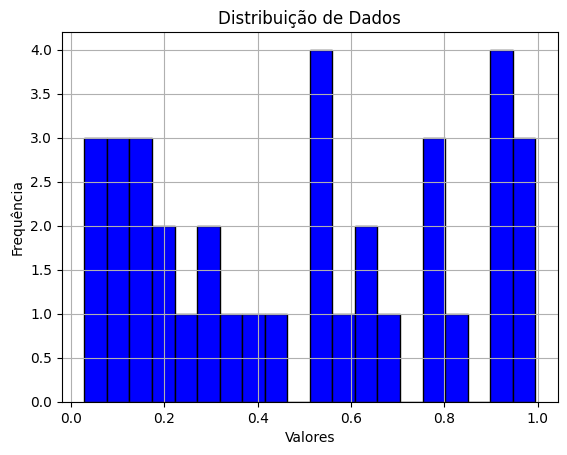


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4972151851467735
Variancia =  0.10154571360823064
DesvioPadrao =  0.31866238185300544
Mediana =  0.5401899586445793
Minimo =  0.028726798542305643
Maximo =  0.9950255816537196
Soma =  17.899746665283846
Contagem =  36


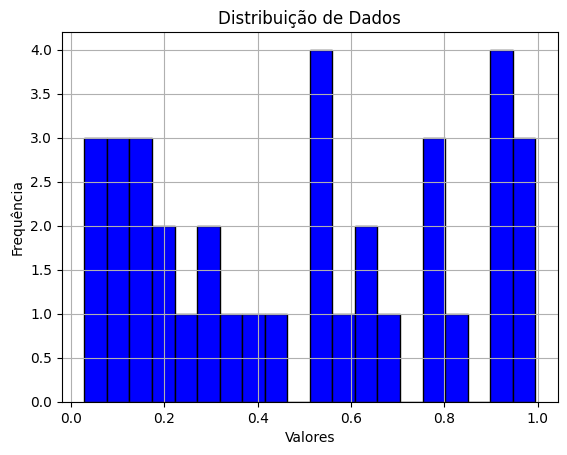


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4271167305577766
Variancia =  0.0648412788940834
DesvioPadrao =  0.25463950772431876
Mediana =  0.4227113940699457
Minimo =  0.01845653412147652
Maximo =  0.9535641615893872
Soma =  15.376202300079958
Contagem =  36


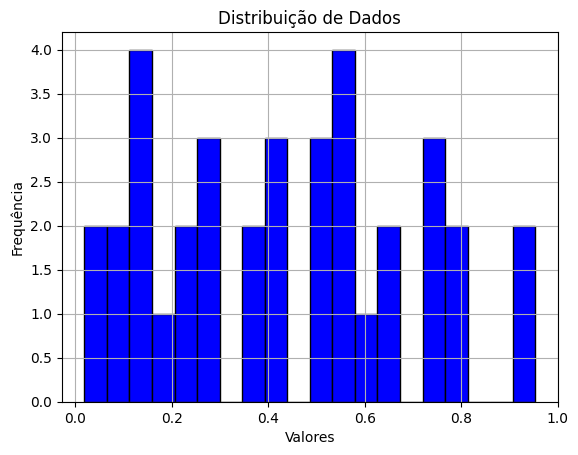


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4481593874795823
Variancia =  0.07467907043783722
DesvioPadrao =  0.27327471606029935
Mediana =  0.45412398077996957
Minimo =  0.01678055625743058
Maximo =  0.9530129009030894
Soma =  16.13373794926496
Contagem =  36


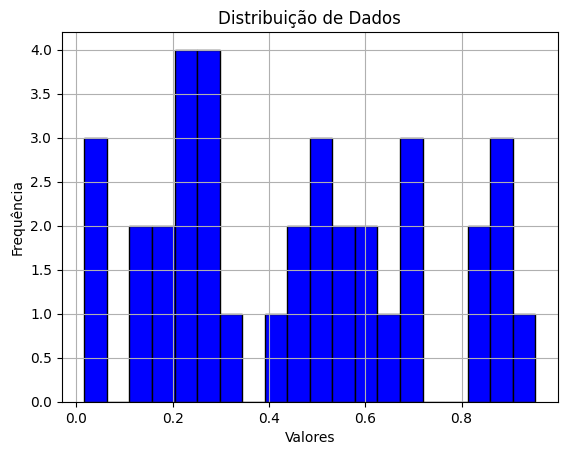


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5666917136471801
Variancia =  0.06853012717967581
DesvioPadrao =  0.26178259525735437
Mediana =  0.5567421639599992
Minimo =  0.013574826437169563
Maximo =  0.9820704312072015
Soma =  20.400901691298483
Contagem =  36


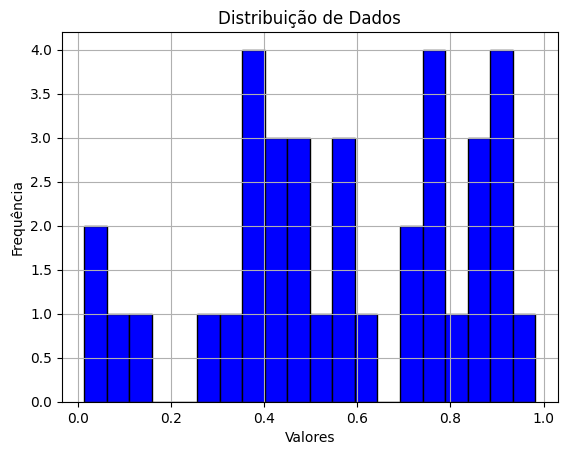


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5150146906192334
Variancia =  0.07115611357879346
DesvioPadrao =  0.26675103294794095
Mediana =  0.4547310359392145
Minimo =  0.01975845293993761
Maximo =  0.9615091294970138
Soma =  18.540528862292405
Contagem =  36


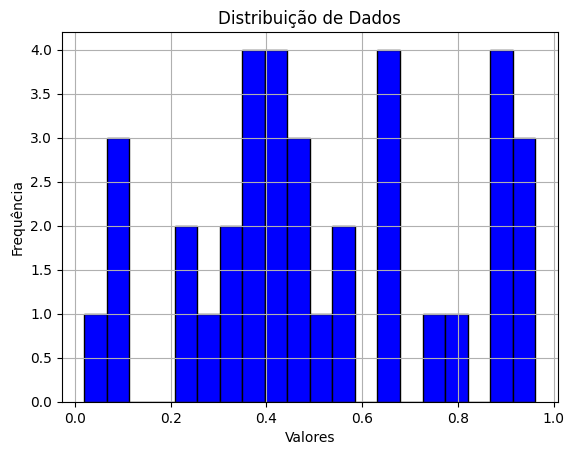


p > alpha --> Aceita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5488009649557773
Variancia =  0.06979545416794236
DesvioPadrao =  0.26418829301833635
Mediana =  0.47626187312203166
Minimo =  0.041527265203486374
Maximo =  0.9880833478505612
Soma =  19.756834738407985
Contagem =  36


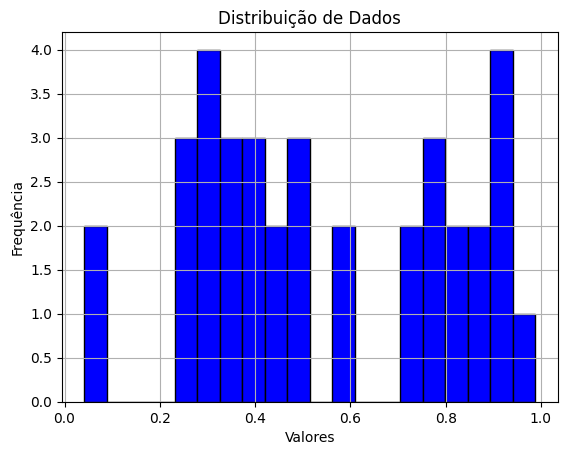


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5488009649557773
Variancia =  0.06979545416794236
DesvioPadrao =  0.26418829301833635
Mediana =  0.47626187312203166
Minimo =  0.041527265203486374
Maximo =  0.9880833478505612
Soma =  19.756834738407985
Contagem =  36


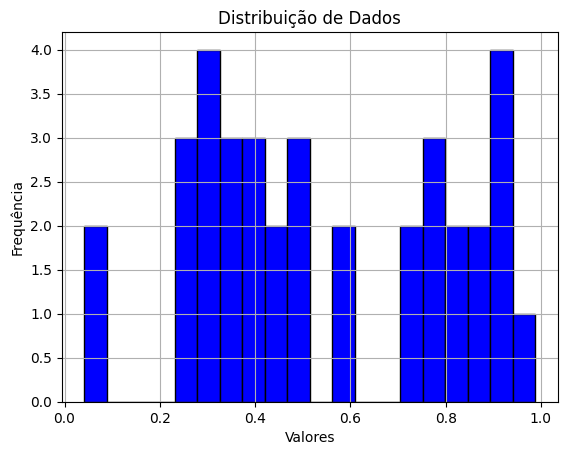


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5475741060876206
Variancia =  0.08629198439613604
DesvioPadrao =  0.29375497339812995
Mediana =  0.581747468308045
Minimo =  0.031070015852240562
Maximo =  0.970698134923281
Soma =  19.71266781915434
Contagem =  36


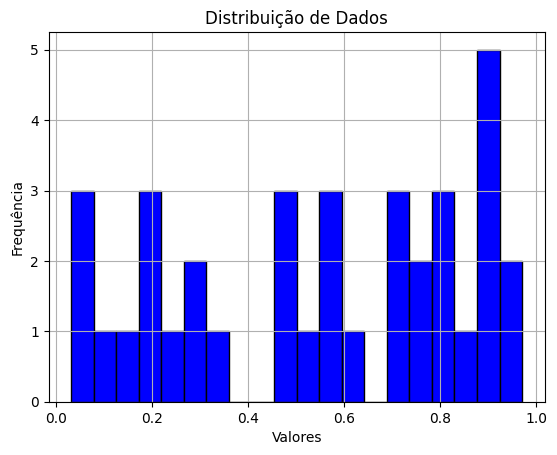


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.5475741060876206
Variancia =  0.08629198439613604
DesvioPadrao =  0.29375497339812995
Mediana =  0.581747468308045
Minimo =  0.031070015852240562
Maximo =  0.970698134923281
Soma =  19.71266781915434
Contagem =  36


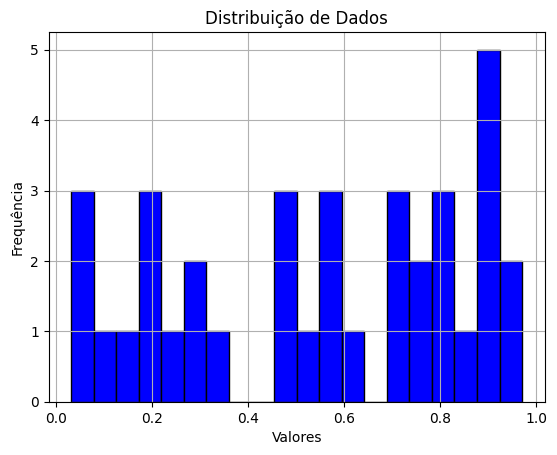


p < alpha --> Rejeita H0

Shapiro-Wilk


Hipotese:

H0 = A amostra segue uma distribuição normal
H1 = A amostra não segue uma distribuição normal
Media =  0.4346965595317514
Variancia =  0.06880213168238014
DesvioPadrao =  0.2623016044220472
Mediana =  0.3891632137999901
Minimo =  0.0377347056753643
Maximo =  0.9598397808573524
Soma =  15.64907614314305
Contagem =  36


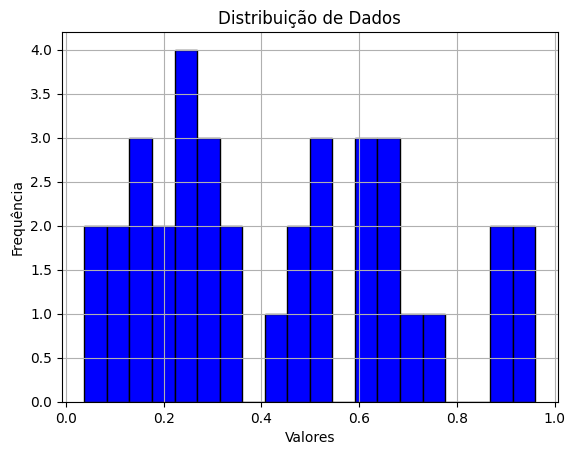


p > alpha --> Aceita H0
['aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0', 'rejeita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'aceita H0', 'rejeita H0', 'rejeita H0', 'aceita H0']


In [ ]:
import numpy as np
from scipy.stats import shapiro


# Número de amostras
num_amostras = 60

# Lista para guardar as amostras
lista_de_amostras = []

# Gerar as amostras e adicionar à lista
for _ in range(num_amostras):
    amostra = np.random.rand(36)  # Gerar uma amostra de tamanho 36 com distribuição normal
    lista_de_amostras.append(amostra)

resultados = []

for a in lista_de_amostras:

  if ShapiroWilk(a) == True:
    resultados.append('aceita H0')
  elif ShapiroWilk(a) == False:
    resultados.append('rejeita H0')


print(resultados)





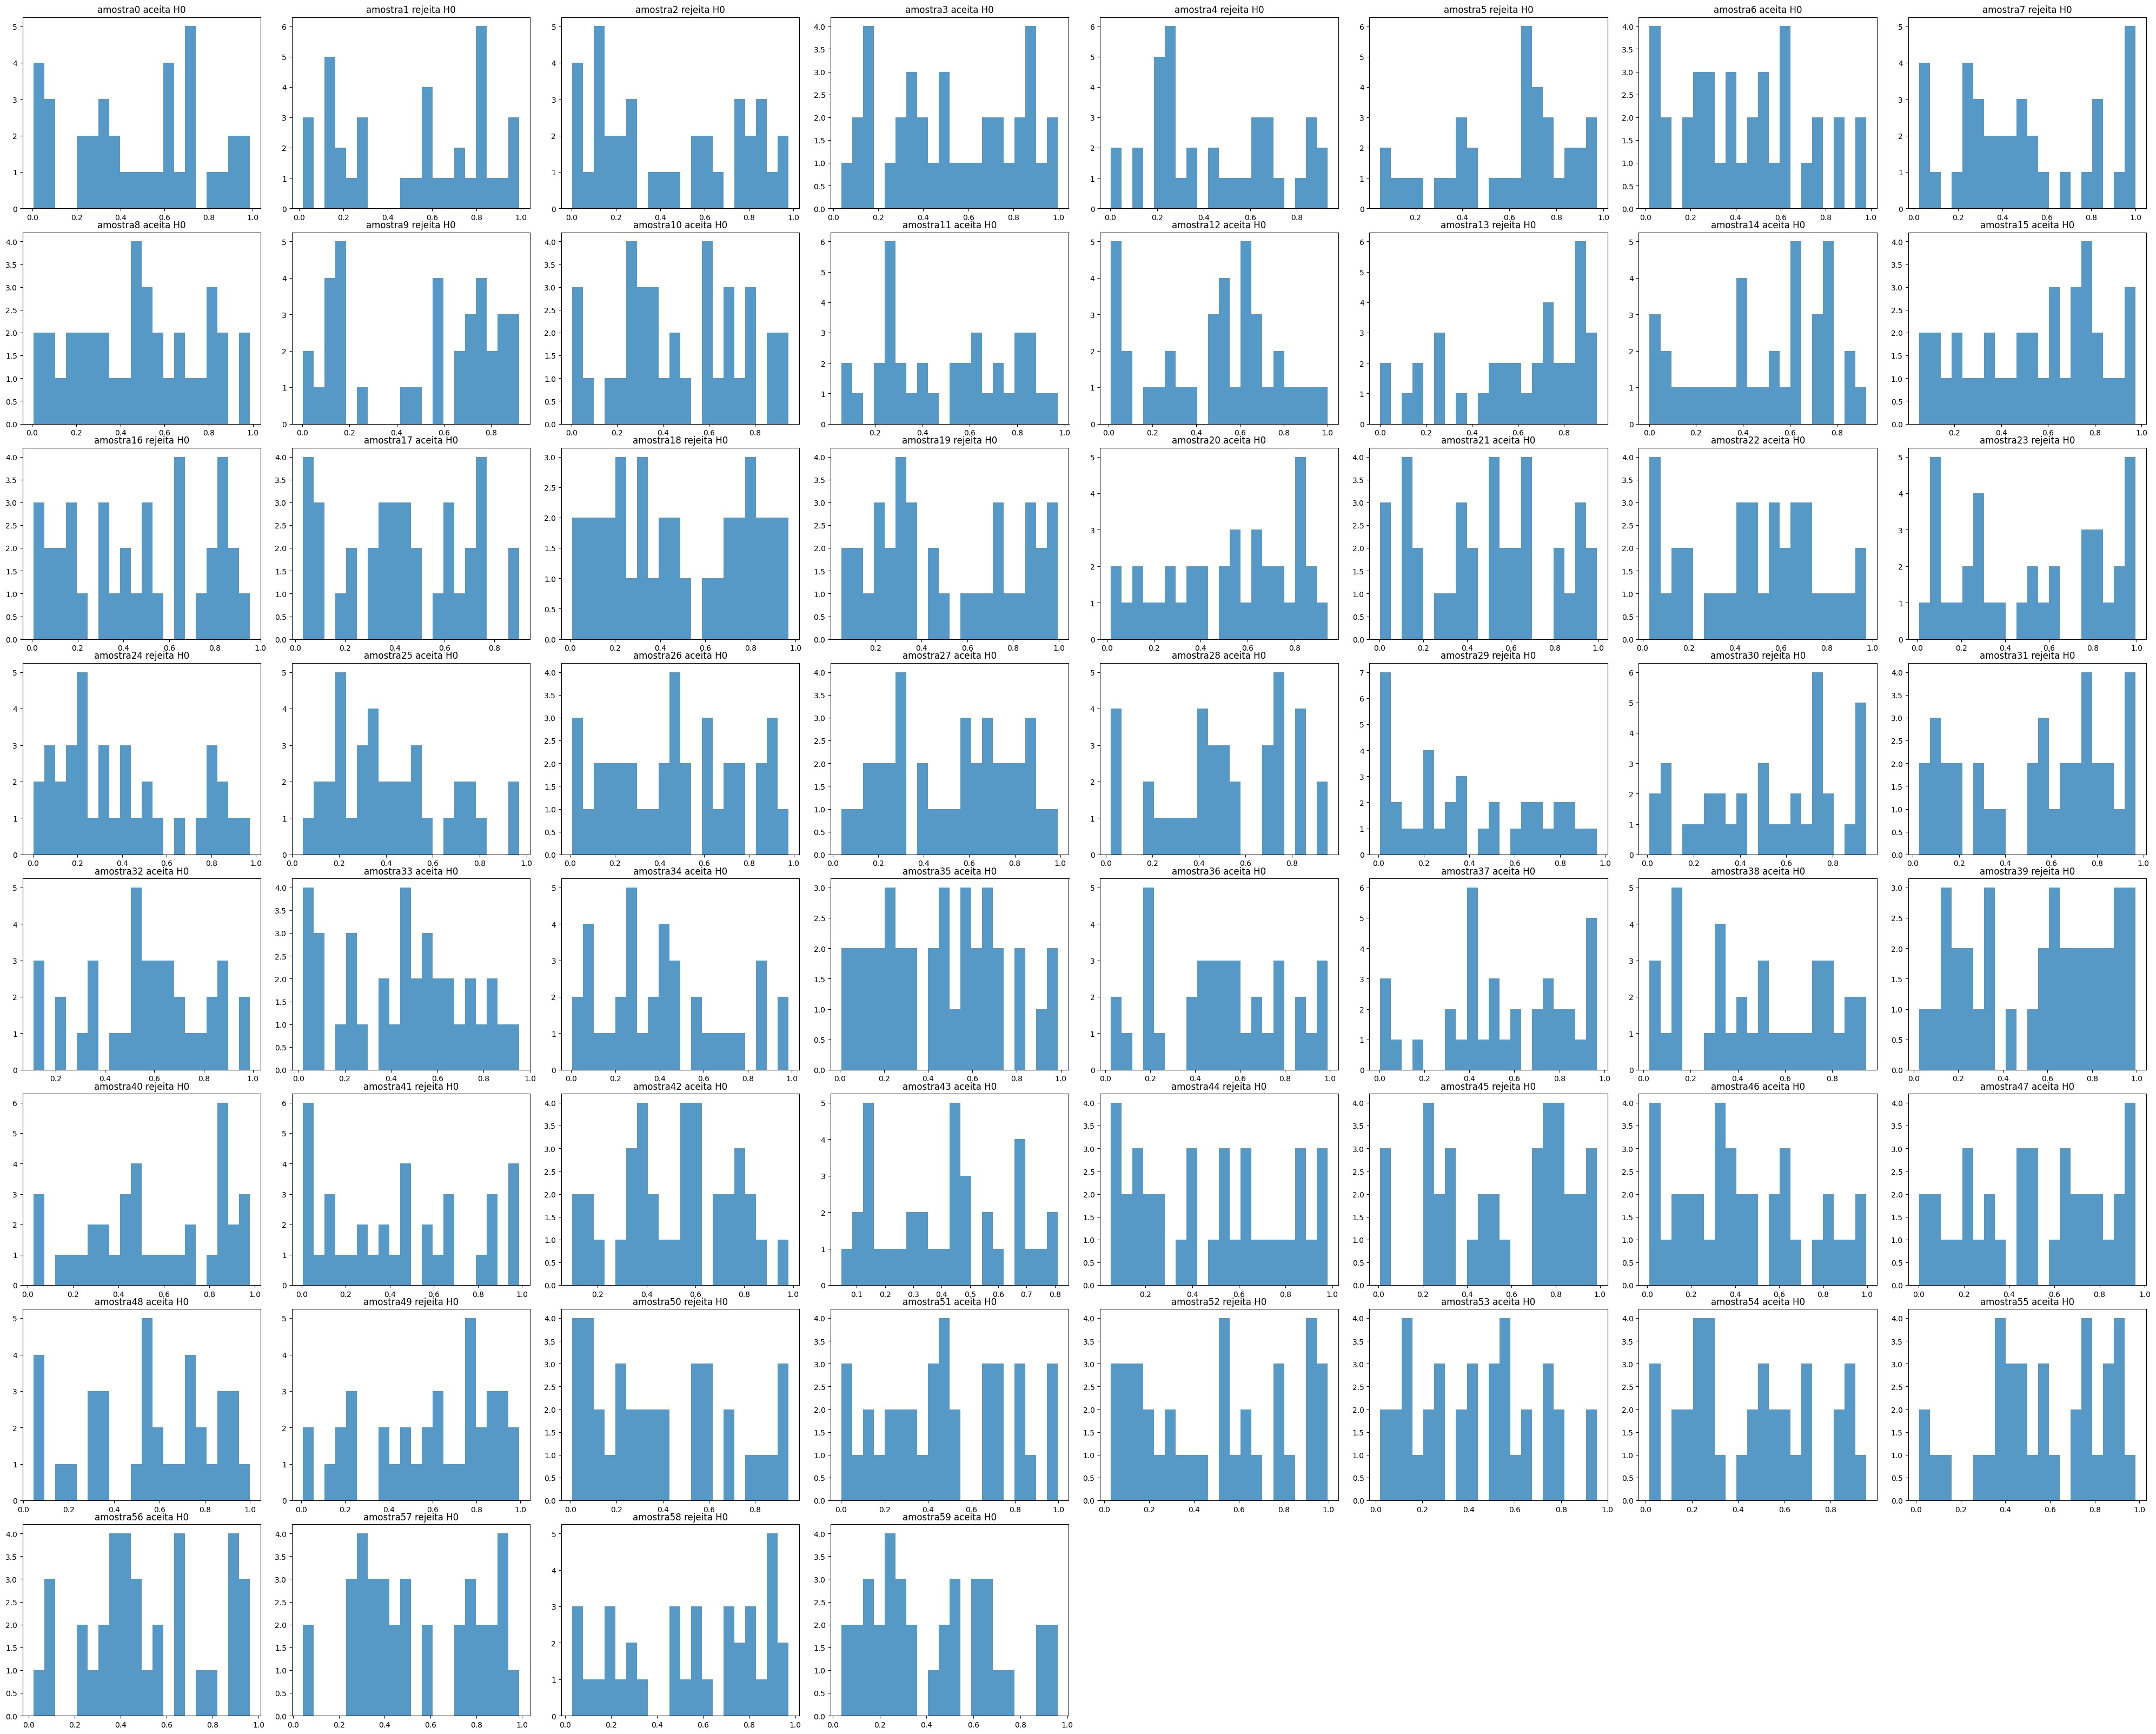

In [ ]:
plot_hist(resultados,*lista_de_amostras)

# Student

## Procedimento
O teste de t-student pode ser usado para:
- a) comparar duas amostras e ver se a diferença entre suas médias é significativa. Para isso, é assumido que:
  - Ambas amostras tenham distribuição normal e suas variações sejam iguais(homocedasticidade).
  - As amostras são aleatórias.
  - **ex:** Ao pesquisar sobre uma empresa em sites de avaliação, as notas e comentários são positivos. Mas na verdade, a realidade é que os comentários positivos eram direcionados a uma área específica da empresa. Um dos possíveis problemas desse cenário infeliz foi a consideração das notas e comentários existentes como aplicáveis para todas as áreas da empresa.
- b) comparar uma amostra com a população, para ver se o que é verdade na amostra também é na pupulação.
  - **ex:** responder perguntas como: “Mulheres e homens nos mesmos cargos recebem, em média, o mesmo salário?
  “As pessoas da área A costumam receber mais aumentos salariais que na área B?”

A realização do teste em a) consiste em

1. Formulação das hipóteses:
    - Hipótese nula (H0): não há diferença significativa entre as médias das duas amostras (µ1 = µ2).
    - Hipótese alternativa (H1): existe uma diferença significativa entre as médias das duas amostras (µ1 ≠ µ2; ou µ1 > µ2; ou µ1 < µ2, dependendo se é um teste de duas caudas ou de uma cauda).
2. Cálculo da estatística de teste

   <img src="https://media.geeksforgeeks.org/wp-content/uploads/formujla.jpg" width='160 rem;'>

A realização do teste em b)
1. Formulação das hióteses:
  -
  -
2. Cálculo da estatística de teste

  <img src="https://dhg1h5j42swfq.cloudfront.net/2021/11/30195343/image-674.png" width='140 rem;'>


onde:
- x̅ é a média amostral
- μ é a média da população (ou a média hipotética)
- s é o desvio padrão da amostra,
- n é o tamanho da amostra.




### Utilizaremos amostras de tamanho 30

In [ ]:
from numpy.random import seed
from numpy.random import normal
from numpy.random import exponential
from scipy.stats import kstest, norm, uniform, expon, poisson
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

### Caso a) Amostras emparelhadas

### Para a comparação de duas amostras.
### Nível de significância α = 0.025, como o teste é bicaudal e GL = 29

### Tcrítico = 2.045

(H0): Não há diferença entre as médias das diferenças dos pares de observações. Ou seja, a diferença média é zero.

(H1): Existe uma diferença entre as médias das diferenças dos pares.


abs(tcalc) > tcrit --> rejeitamos a H0

abs(tcalc) < tcrit --> aceitamos a H0

In [ ]:
np.random.seed(0)

# Gerar amostra para distribuição normal
amostra_normal1 = norm.rvs(loc=0, scale=1, size=30)
amostra_normal2 = norm.rvs(loc=0, scale=1, size=30)


In [ ]:
print(HistogramaSimples(amostra_normal1))

NameError: name 'HistogramaSimples' is not defined

In [ ]:
print(HistogramaSimples(amostra_normal2))

In [ ]:
def t_student1(amostra1, amostra2):
  std1 = np.std(amostra1)
  mean1 = np.mean(amostra1)
  size1 = len(amostra1)

  std2 = np.std(amostra2)
  mean2 = np.mean(amostra2)
  size2 = len(amostra2)

  t = abs((mean1 - mean2) / math.sqrt((std1**2 / size1) + (std2**2 / size2)))
  return t


In [ ]:
t1 = t_student1(amostra_normal1,amostra_normal2)
t1

### Como tcalc > tcrítico, rejeitamos a hipótese H0, o que significia que existem evidências suficientes para que as amostras apresentem uma diferença entre suas médias

### Caso b) Comparar a amostra com a população total

H0: A hipótese nula afirma que a média da amostra (x̅) é igual à média populacional conhecida.

H1: A hipótese alternativa afirma que a média da amostra difere da média populacional.

PARA UM TESTE BICAUDAL:

tcalc > tcrit --> rejeite (H_0).

tcalc < tcrit --> não rejeite (H_0).

### Para a comparação de duas amostras.
### nível de significância α = 0.05, GL = 29 portanto tcrit = 1.699

In [ ]:
amostra_normal3 = norm.rvs(loc=0, scale=1, size=30)
print(HistogramaSimples(amostra_normal3))


In [ ]:
np.mean(amostra_normal3)

In [ ]:
def t_student2(amostra, mean_pop):
  size = len(amostra)

  mean_amos = np.mean(amostra)

  std_amos = np.std(amostra, ddof=1) # ddof=1 para utilizar o denominador n-1 no denominador, tornando-o um desvio padrão amostral em vez de um desvio padrão populacional.

  tc = abs((mean_amos - mean_pop) / (std_amos / np.sqrt(size)))

  return tc


In [ ]:
t_student2(amostra_normal3, 0.3)

#### Nesse caso como tcalc > tcrit, rejeitamos a hipótese H0 e concluímos que existem evidências suficientes para afirmar que existe uma diferença significativa entre as médias.

#### Testando com uma amostra maior, tamanho 100 .
#### Nesse caso α = 0.05 e GL=99 e tcrit = 2.000


In [ ]:
amostra_normal4 = norm.rvs(loc=0, scale=1, size=100)
print(HistogramaSimples(amostra_normal4))


In [ ]:
t_student2(amostra_normal4, 0.1)

#### Nesse caso obtivemos tcalc < tcrit, ou seja, **não** rejeitamos H0  pois não há evidência suficiente para mostrar uma diferença significatíva.

### Resultados finais de student

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supondo que temos os seguintes dados para a tabela
dados = {
    "Distribuicao": ["Normal1", "Normal2", "Normal3", "Normal4"],
    "H0": ["Rejeitado", "Rejeitado", "Rejeitado", "Não rejeitado"],
    "H1": ["Não rejeitado", "Não rejeitado", "Não rejeitado", "Rejeitado"]
}

# Convertendo os dados para um DataFrame do pandas
df = pd.DataFrame(dados)

# Criando uma figura sem eixos para a plotagem da tabela
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off') # Esconde os eixos

# Plotando a tabela
# O loc='center' centraliza a tabela na figura
# O bbox_to_anchor ajusta a posição da tabela dentro da figura
tbl = table(ax, df, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])


tbl.auto_set_font_size(False)
tbl.set_fontsize(12) # Ajusta o tamanho da fonte
tbl.auto_set_column_width(col=list(range(len(df.columns)))) # Ajusta a largura das colunas

plt.title("Teste Student")
plt.show()

# Z-Score

##Procedimento

O Z-score é uma medida estatística que descreve a posição de um dado valor em relação à média de um grupo de valores, expressando essa distância em termos do desvio padrão do grupo.

O Z-score pode ser obtido por:

<img src='https://www.simplypsychology.org/wp-content/uploads/Z-score-formula.jpg' width='150rem'>

Onde:
  -  µ consiste na média do conjunto de dados
  -  X é o valor que esta sendo analisado
  - Sigma é o desvio padrão do conjunto de dados

Um Z-score de 0 indica que o valor é exatamente igual à média do conjunto; um Z-score positivo indica que o valor está acima da média, enquanto um Z-score negativo indica que o valor está abaixo da média.


In [ ]:
#módulos

import numpy as np
import pandas as pd

from scipy.stats import *
from math import sqrt
from matplotlib import pyplot as plt

In [ ]:
def HistogramaSimples(data):

    plt.hist(data, bins=20, color='blue', edgecolor='black')
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

def HistogramaComparativo(data):

    #data é um array de arrays

    plt.figure(figsize=(10,5))
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)

    for i in range(len(data)):
        plt.hist(data[i], bins=20, color='blue', edgecolor='black', alpha=0.5)

In [ ]:
def Zscore(rol,alpha,M):


   print("Z-Score\n")
   print('Hipoteses:')
   print('H0 --> M = ',M)
   print('H1 --> M != ',M)

   sigmaXb = np.std(rol, ddof=1)/np.sqrt(len(rol))
   zCalc = (np.mean(rol)-M)/sigmaXb

   """
   Os valores críticos da estatística (zc) são apresentados na Tabela E do apêndice.
   Essa tabela fornece os valores críticos de zc tal que P(𝑍𝑐𝑎𝑙𝑐 > zc) = α
   (para um teste unilateral à direita).
   """

   zc = t.ppf(1-alpha/2, len(rol)-1)

   HistogramaSimples(rol)

   if abs(zCalc) > zc:
      print('\nZcalc > Zc --> Rejeita H0')
      return False
   else:
      print('\nZcalc <= Zc --> Aceita H0')
      return True





In [ ]:
normal = np.random.normal(30,5,50)

Z-Score

Hipoteses:
H0 --> M =  30
H1 --> M !=  30


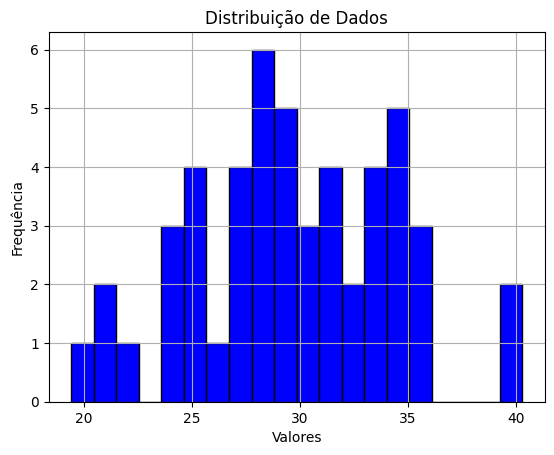


Zcalc <= Zc --> Aceita H0


True

In [ ]:
#Caso de teste 001 - Teste com sucesso
Zscore(normal,0.05,30)

Z-Score

Hipoteses:
H0 --> M =  35
H1 --> M !=  35


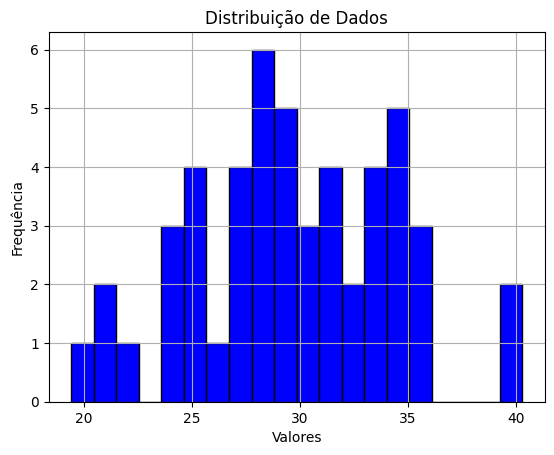


Zcalc > Zc --> Rejeita H0


False

In [ ]:
#Caso de teste 002 - Teste para false
Zscore(normal,0.05,35)

### Resumo resultados Z-score

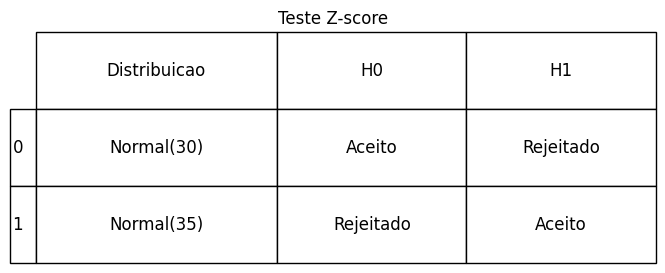

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Supondo que temos os seguintes dados para a tabela
dados = {
    "Distribuicao": ["Normal(30)", "Normal(35)"],
    "H0": ["Aceito", "Rejeitado"],
    "H1": ["Rejeitado", "Aceito"]
}

# Convertendo os dados para um DataFrame do pandas
df = pd.DataFrame(dados)

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off') # Esconde os eixos

# Plotando a tabela
# O loc='center' centraliza a tabela na figura
# O bbox_to_anchor ajusta a posição da tabela dentro da figura
tbl = table(ax, df, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

# Ajustando o estilo da tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(12) # Ajusta o tamanho da fonte
tbl.auto_set_column_width(col=list(range(len(df.columns)))) # Ajusta a largura das colunas

plt.title("Teste Z-score")

plt.show()

#Bartlett

#### Procedimento

O teste estatístico de Bartlett é utilizado para verificar a homogeneidade das variâncias (ou seja, igualdade de variâncias) entre duas ou mais amostras.

Hipóteses:

Hipótese Nula (H0): As variâncias das populações das quais as amostras foram retiradas são iguais.

Hipótese Alternativa (H1): Pelo menos uma das variâncias das populações é diferente das outras.

Cálculos: O teste de Bartlett calcula um valor de estatística de teste baseado nas variâncias amostrais, tamanhos de amostra, e o número total de amostras. O teste assume que os dados de cada grupo são normalmente distribuídos.

A estatística de teste é calculada usando a fórmula, que envolve os logitmos das variâncias amostrais e um termo de correção para pequenas amostras. A fórmula é projetada de tal forma que, se as variâncias forem iguais, a estatística de teste seguirá uma distribuição qui-quadrado.

In [ ]:
#modulos

import numpy as np
import pandas as pd

from scipy.stats import *
from math import sqrt
from matplotlib import pyplot as plt

In [ ]:
#histograma

def HistogramaSimples(data):

    plt.hist(data, bins=20, color='blue', edgecolor='black')
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

def HistogramaComparativo(data):

    #data é um array de arrays

    plt.figure(figsize=(10,5))
    plt.title('Distribuição de Dados')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(True)

    for i in range(len(data)):
        plt.hist(data[i], bins=20, color='blue', edgecolor='black', alpha=0.5)


In [ ]:
def Bartlett(rol,alpha=0.05,graf = True ):

    print("Bartlett\n")
    print('Hipoteses:')
    print('H0 --> As variancias são iguais')
    print('H1 --> As variancias não são iguais')

    #rol = lista de listas

    N = 0
    Ni = []
    Vari = []

    for i in range(len(rol)):
        N += len(rol[i])
        Ni.append(len(rol[i]))
        Vari.append(np.var(rol[i]))

    Sp2 = np.sum((np.array(Ni)-1)*(np.array(Vari)))/(N-len(rol))

    q = (N-len(rol))*np.log(Sp2) - np.sum((np.array(Ni)-1)*np.log(np.array(Vari)))
    c = 1 + (1/(3*(len(rol)-1)))*(np.sum(1/(np.array(Ni)-1))-1/(N-len(rol)))

    Bcalc = q/c

    X2c = chi2.ppf(1-alpha,len(rol)-1)

    if graf:
        HistogramaComparativo(rol)


    if Bcalc > X2c:
        print('\nBcalc > X2c --> Rejeita H0')
        return False

    else:
        print('\nBcalc <= X2c --> Aceita H0')
        return True

In [ ]:
Normal = np.random.normal(30,5,50)
Normal2 = np.random.normal(30,5,50)

Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc <= X2c --> Aceita H0


True

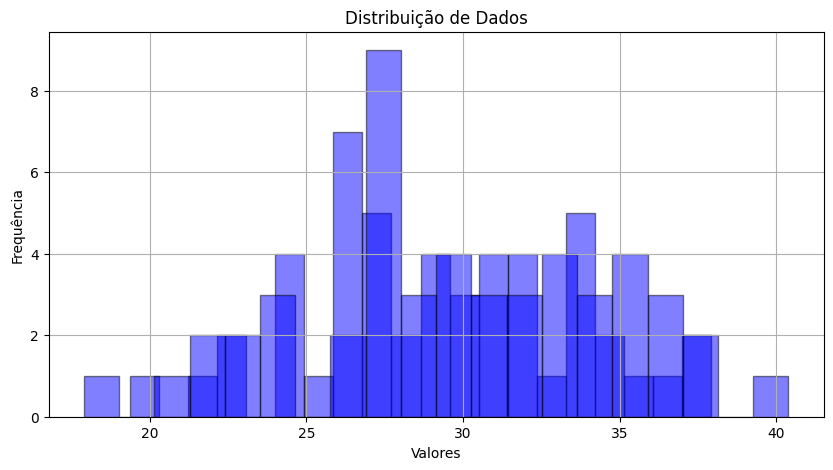

In [ ]:
Bartlett([Normal,Normal2],0.05)

In [ ]:
Normal = np.random.normal(30,5,50)
Normal2 = np.random.normal(30,10,50)

Bartlett

Hipoteses:
H0 --> As variancias são iguais
H1 --> As variancias não são iguais

Bcalc > X2c --> Rejeita H0


False

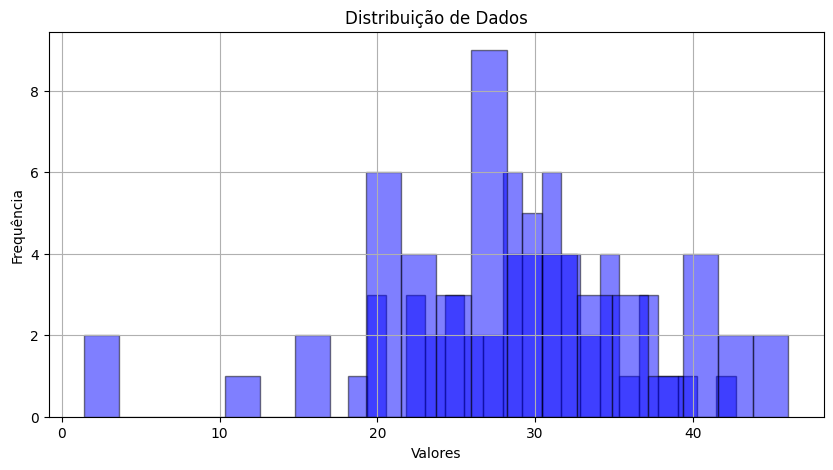

In [ ]:
Bartlett([Normal,Normal2],0.05)

### Resumo resultados Bartlett

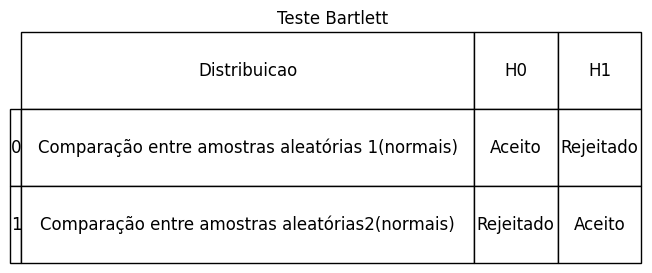

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

dados = {
    "Distribuicao": ["Comparação entre amostras aleatórias 1(normais)", "Comparação entre amostras aleatórias2(normais)"],
    "H0": ["Aceito", "Rejeitado"],
    "H1": ["Rejeitado", "Aceito"]
}

# Convertendo os dados para um DataFrame do pandas
df = pd.DataFrame(dados)

# Criando uma figura sem eixos para a plotagem da tabela
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off') # Esconde os eixos

# Plotando a tabela
# O loc='center' centraliza a tabela na figura
# O bbox_to_anchor ajusta a posição da tabela dentro da figura
tbl = table(ax, df, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

# Ajustando o estilo da tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(12) # Ajusta o tamanho da fonte
tbl.auto_set_column_width(col=list(range(len(df.columns)))) # Ajusta a largura das colunas

plt.title("Teste Bartlett") # Adiciona título
plt.show()